In [2951]:
# 필요한 라이브러리 import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    classification_report,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2952]:
df_train = pd.read_csv("train.csv") # 학습용 데이터
df_test = pd.read_csv("submission.csv") # 테스트 데이터(제출파일의 데이터)

In [2953]:
df_test['is_converted'] = np.nan
df_test = df_test.drop(["id"], axis=1)

In [2954]:
df_train

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.00,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.00,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.00,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.00,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.00,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,/Sląskie/Poland,AS,NaN,33747,End Customer,SMB,NaN,NaN,NaN,...,LGEPL,3 months ~ 6 months,0,0,0.000026,0.028777,public facility,Others,694,False
59295,0.75,/Bogotá DC /Colombia,AS,0.040000,35420,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGECB,9 months ~ 1 year,0,0,0.000026,0.028777,public facility,NaN,39,False
59296,0.75,/Pisco/Peru,AS,0.040000,19249,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEPR,less than 3 months,0,0,0.000026,0.028777,public facility,NaN,125,False
59297,1.00,/santa cruz bolivia/Peru,AS,0.040000,40327,NaN,Enterprise,NaN,NaN,NaN,...,LGEPR,more than a year,0,0,0.000026,0.028777,public facility,NaN,134,False


In [2955]:
df_test

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,0.00,/ / Brazil,ID,0.073248,47466,End Customer,Enterprise,53.0,NaN,NaN,...,LGESP,NaN,1,0,0.001183,0.049840,retail,Electronics & Telco,278,NaN
1,0.25,400 N State Of Franklin Rd Cloud IT / Johnson...,IT,NaN,5405,End Customer,SMB,NaN,NaN,NaN,...,LGEUS,NaN,0,0,0.000013,NaN,transportation,Others,437,NaN
2,1.00,/ / U.A.E,ID,NaN,13597,Specifier/ Influencer,SMB,NaN,NaN,NaN,...,LGEGF,less than 3 months,0,0,0.000060,0.131148,hospital & health care,General Hospital,874,NaN
3,0.50,/ Madison / United States,ID,0.118644,17204,NaN,Enterprise,NaN,NaN,NaN,...,LGEUS,more than a year,0,0,0.001183,0.049840,retail,NaN,194,NaN
4,1.00,/ Sao Paulo / Brazil,ID,0.074949,2329,End Customer,Enterprise,2.0,1.0,NaN,...,LGESP,less than 3 months,1,1,0.003079,0.064566,corporate / office,Engineering,167,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,0.50,/São Paulo/Brazil,AS,NaN,40292,NaN,Enterprise,10.0,NaN,NaN,...,LGESP,NaN,0,0,NaN,NaN,NaN,NaN,97,NaN
5267,0.25,General / / United States,IT,NaN,47466,NaN,Enterprise,0.0,NaN,NaN,...,LGEUS,NaN,0,0,NaN,NaN,NaN,NaN,438,NaN
5268,0.75,/ OURO BRANCO / Brazil,AS,NaN,46227,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGESP,less than 3 months,0,0,NaN,NaN,NaN,NaN,97,NaN
5269,0.00,/ / Germany,IT,NaN,45667,End Customer,SMB,NaN,NaN,NaN,...,LGEDG,NaN,0,0,NaN,NaN,NaN,NaN,429,NaN


In [2956]:
unique_values = df_train['customer_idx'].unique()
unique_cnt = df_train['customer_idx'].nunique()

print(unique_values)
print(unique_cnt)

[32160 23122  1755 ... 19249 40327 30268]
35112


In [2957]:
unique_values = df_test['customer_idx'].unique()
unique_cnt = df_test['customer_idx'].nunique()

print(unique_values)
print(unique_cnt)

[47466  5405 13597 ... 46227 45667 23646]
4069


In [2958]:
# ------------------------------------------------------------------------------------------------------
#
# 너무 높은 카디널리티는 과적합 위험이 있기에 과감히 제거 고려
#
# ------------------------------------------------------------------------------------------------------

In [2959]:
# df_train.drop(columns=['customer_idx'], inplace=True)
# df_test.drop(columns=['customer_idx'], inplace=True)

In [2960]:
df_train.isnull().sum()

bant_submit                    0
customer_country             982
business_unit                  0
com_reg_ver_win_rate       44731
customer_idx                   0
customer_type              43961
enterprise                     0
historical_existing_cnt    45543
id_strategic_ver           55855
it_strategic_ver           58178
idit_strategic_ver         54734
customer_job               18733
lead_desc_length               0
inquiry_type                 941
product_category           19374
product_subcategory        50064
product_modelname          50070
customer_country.1           982
customer_position              0
response_corporate             0
expected_timeline          30863
ver_cus                        0
ver_pro                        0
ver_win_rate_x             40882
ver_win_ratio_per_bu       43995
business_area              40882
business_subarea           53773
lead_owner                     0
is_converted                   0
dtype: int64

In [2961]:
# 결측치가 많은(60% 이상) columns들은 과감히 삭제

col_to_drop = [
    'com_reg_ver_win_rate', 
    'customer_type', 
    'historical_existing_cnt', 
    'id_strategic_ver', 
    'it_strategic_ver',
    'idit_strategic_ver',
    'product_subcategory',
    'product_modelname',
    'ver_win_rate_x',
    'ver_win_ratio_per_bu',
    'business_area',
    'business_subarea',
]

df_train = df_train.drop(col_to_drop, axis=1)
df_test = df_test.drop(col_to_drop, axis=1)

In [2962]:
# 두 칼럼의 내용이 같은지 다른지 확인함.

is_equal = df_train['customer_country'].equals(df_train['customer_country.1'])

if is_equal:
    print("두 칼럼의 내용은 같습니다.")
else:
    print("두 칼럼의 내용은 다릅니다.")

두 칼럼의 내용은 같습니다.


In [2963]:
# 두 칼럼의 내용이 같은지 다른지 확인함.

is_equal = df_test['customer_country'].equals(df_test['customer_country.1'])

if is_equal:
    print("두 칼럼의 내용은 같습니다.")
else:
    print("두 칼럼의 내용은 다릅니다.")

두 칼럼의 내용은 같습니다.


In [2964]:
# 두 칼럼이 모두 response_corporate 칼럼과 내용이 흡사하다고 판단하여 삭제

df_train.drop(columns=['customer_country.1', 'customer_country'], inplace=True)
df_test.drop(columns=['customer_country.1', 'customer_country'], inplace=True)

In [2965]:
df_train.isnull().sum()

bant_submit               0
business_unit             0
customer_idx              0
enterprise                0
customer_job          18733
lead_desc_length          0
inquiry_type            941
product_category      19374
customer_position         0
response_corporate        0
expected_timeline     30863
ver_cus                   0
ver_pro                   0
lead_owner                0
is_converted              0
dtype: int64

In [2966]:
df_test.isnull().sum()

bant_submit              0
business_unit            0
customer_idx             0
enterprise               0
customer_job          1439
lead_desc_length         0
inquiry_type          1292
product_category      1858
customer_position        0
response_corporate       0
expected_timeline     2408
ver_cus                  0
ver_pro                  0
lead_owner               0
is_converted          5271
dtype: int64

In [2967]:
object_columns = df_train.select_dtypes(include=['object']).columns
num_columns = df_train.select_dtypes(exclude=['object', 'bool']).columns

In [2968]:
object_columns

Index(['business_unit', 'enterprise', 'customer_job', 'inquiry_type',
       'product_category', 'customer_position', 'response_corporate',
       'expected_timeline'],
      dtype='object')

In [2969]:
num_columns

Index(['bant_submit', 'customer_idx', 'lead_desc_length', 'ver_cus', 'ver_pro',
       'lead_owner'],
      dtype='object')

In [2970]:
# # object_columns에 저장된 열들의 문자열을 소문자로 변환
# df_train[object_columns] = df_train[object_columns].apply(lambda x: x.str.lower() if x.dtype == "object" else x)
# df_test[object_columns] = df_test[object_columns].apply(lambda x: x.str.lower() if x.dtype == "object" else x)

In [2971]:
# ------------------------------------------------------------------------------------------------------

In [2972]:
unique_values = df_train['business_unit'].unique()
unique_cnt = df_train['business_unit'].nunique()

print(unique_values)
print(unique_cnt)

['AS' 'ID' 'IT' 'Solution' 'CM']
5


In [2973]:
unique_values = df_test['business_unit'].unique()
unique_cnt = df_test['business_unit'].nunique()

print(unique_values)
print(unique_cnt)

['ID' 'IT' 'AS']
3


In [2974]:
# ------------------------------------------------------------------------------------------------------

In [2975]:
unique_values = df_train['enterprise'].unique()
unique_cnt = df_train['enterprise'].nunique()

print(unique_values)
print(unique_cnt)

['Enterprise' 'SMB']
2


In [2976]:
unique_values = df_test['enterprise'].unique()
unique_cnt = df_test['enterprise'].nunique()

print(unique_values)
print(unique_cnt)

['Enterprise' 'SMB']
2


In [2977]:
# ------------------------------------------------------------------------------------------------------

In [2978]:
unique_values = df_train['customer_job'].unique()
unique_cnt = df_train['customer_job'].nunique()

print(unique_values)
print(unique_cnt)

['purchasing' 'media and communication' 'engineering' 'entrepreneurship'
 'consulting' 'program and project management' 'sales' 'other'
 'operations' nan 'administrative' 'business development'
 'information technology' 'accounting' 'education' 'healthcare services'
 'human resources' 'support' 'finance' 'marketing' 'legal'
 'quality assurance' 'arts and design' 'real estate'
 'military and protective services' 'research' 'product management'
 'bidder' 'community and social services' 'research/install'
 'project manager' 'technical' 'details send' 'architect' 'curation'
 'developer/property' 'radiology professional' 'graphic/color art'
 'medical imaging specialist' 'medical solution provider' 'manager'
 'owner' 'designer' 'recommend' 'consultant / purchaser'
 'system installer' 'technical advisor, reseller' 'director it'
 'execution' 'owning company' 'president for sennco'
 'artist, lead on equipment selection' 'specifier / integrator'
 'systems designer' 'public bidder' 'technology de

In [2979]:
unique_values = df_test['customer_job'].unique()
unique_cnt = df_test['customer_job'].nunique()

print(unique_values)
print(unique_cnt)

['consulting' nan 'information technology' 'sales' 'engineering'
 'marketing' 'purchasing' 'others' 'operations' 'support' 'finance'
 'business development' 'administrative' 'education' 'product management'
 'program and project management' 'entrepreneurship'
 'community and social services' 'media and communication'
 'arts and design' 'healthcare services' 'accounting'
 'medical imaging specialist' 'clinical specialist' 'curation' 'other'
 '3d/vfx art' 'legal' 'radiology professional'
 'military and protective services' 'real estate' 'human resources'
 'healthcare' 'electronics & telco' 'quality assurance' 'pathologist'
 'research' 'surgery professional' 'film production' 'k12 school'
 'media and communications' 'medical solution provider']
41


In [2980]:
df_train['customer_job'].value_counts()

customer_job
engineering                       6342
other                             4852
administrative                    3359
education                         2287
sales                             2218
                                  ... 
appliance specialist                 1
av estimator                         1
purchasers                           1
pricing                              1
exhibition / convention center       1
Name: count, Length: 560, dtype: int64

In [2981]:
df_test['customer_job'].value_counts()

customer_job
engineering                         728
others                              482
education                           408
administrative                      307
information technology              231
operations                          195
purchasing                          180
consulting                          166
business development                164
sales                               162
entrepreneurship                    119
arts and design                     102
program and project management       96
marketing                            94
media and communication              48
support                              47
healthcare services                  44
finance                              42
product management                   36
accounting                           34
real estate                          26
other                                24
community and social services        22
legal                                17
human resources            

In [2982]:
# 'customer_job' 열의 값 빈도를 계산합니다.
job_counts = df_train['customer_job'].value_counts()

# 결과를 DataFrame으로 변환합니다.
job_counts_df = pd.DataFrame(job_counts)

# CSV 파일로 저장합니다.
job_counts_df.to_csv('customer_job_counts.csv')

In [2983]:
import pandas as pd

df_train['customer_job'] = df_train['customer_job'].replace(['engineer', 'engineering & technical', 'chief engineer', 'sales engineering', 'engineering & technical executive', 'design engineer', 'solution engineer', 'engineering, design, and install', 'principal engineer', 'systems engineer', 'system engineer', 'designer/ engineer', 'senior design engineer', 'engineering director', 'director of engineering', 'lead engineer', 'project engineer', 'chief of engineering', 'hardware design engineer'], 'engineering')
df_train['customer_job'] = df_train['customer_job'].replace('other', 'others')
df_train['customer_job'] = df_train['customer_job'].replace(['educator', 'higher education (college & university)'], 'education')
df_train['customer_job'] = df_train['customer_job'].replace(['administrative assistant', 'administration', 'pacs administrator', 'administración', 'facility administrator', 'it administrator', 'project administrator', 'systems administrator', 'platform administrator', 'network administrator', 'imaging administrator'], 'administrative')
df_train['customer_job'] = df_train['customer_job'].replace(['information_technology', 'information technology​', 'it - information technology'], 'information technology')
df_train['customer_job'] = df_train['customer_job'].replace(['operations manager', 'sales operations', 'operations executive', 'marketing operations', 'strategy & operations specialist', 'regional director of operations', 'director of operations'], 'operations')
df_train['customer_job'] = df_train['customer_job'].replace(['purchaser', 'purchase', 'purchasing agent', 'purchasing manager', 'designer purchaser', 'purchase dept'], 'purchasing')
df_train['customer_job'] = df_train['customer_job'].replace(['arquitecto/consultor', 'consultant', 'consultent', 'technology consultant', 'design consultant'], 'consulting')
df_train['customer_job'] = df_train['customer_job'].replace(['business_development', 'business owner'], 'business development')
df_train['customer_job'] = df_train['customer_job'].replace(['sales manager', 'sales executive', 'sale', 'salesman', 'technical sales', 'sales rep', 'installer/sales rep'], 'sales')

df_train['customer_job'] = df_train['customer_job'].replace(['art and design', 'arts_and_design'], 'arts and design')



df_train['customer_job'] = df_train['customer_job'].replace('other', 'others')
df_train['customer_job'] = df_train['customer_job'].replace('other', 'others')




df_train['customer_job'] = df_train['customer_job'].replace('purchaser', 'purchasing')




df_test['customer_job'] = df_test['customer_job'].replace('other', 'others')

In [2984]:
import pandas as pd

most_frequent_value = df_train['customer_job'].mode()[0]
df_train['customer_job'] = df_train['customer_job'].fillna(most_frequent_value)

most_frequent_value = df_test['customer_job'].mode()[0]
df_test['customer_job'] = df_test['customer_job'].fillna(most_frequent_value)

In [2985]:
# ------------------------------------------------------------------------------------------------------

In [2986]:
unique_values = df_train['inquiry_type'].unique()
unique_cnt = df_train['inquiry_type'].nunique()

print(unique_values)
print(unique_cnt)

['Quotation or purchase consultation' 'Product Information'
 'Quotation or Purchase Consultation' 'Other'
 'Usage or technical consultation' 'Trainings' 'Services' 'Sales Inquiry'
 'Etc.' 'Technical Support' 'Usage or Technical Consultation'
 'Technical Consultation' 'Request for Partnership' nan 'sales'
 'technical' 'usage or technical consultation'
 'usage_or_technical_consultation' 'other'
 'quotation_or_purchase_consultation' 'other_' 'Request a Demo'
 'Request for Distributorship' 'Request for quotation or purchase'
 'Request for technical consulting' '(Select ID_Needs)' 'One Quick:Flex'
 'AIO' 'Needs' 'Purchase' 'technical_consultation' 'Customer Suggestions'
 'Event Inquiry' 'Others' 'OEM/ODM Request' 'Hospital TV' 'others'
 'i want to know the details about it' 'EDUCATIONAL EQUIPMENTS'
 'Digital platform' 'TV interactive' 'teach' 'Display Textbook and photos'
 'High inch 86 / 98 or 110' 'quotation_' 'Purchase or Quotation'
 'display product' 'first Info and pricing' 'Sales inqu

In [2987]:
unique_values = df_test['inquiry_type'].unique()
unique_cnt = df_test['inquiry_type'].nunique()

print(unique_values)
print(unique_cnt)

[nan 'Quotation or Purchase Consultation' 'Product Information'
 'Technical Consultation' 'Others' 'Request for Partnership'
 'Usage or Technical Consultation' 'Services' 'Customer Suggestions'
 'Request a Demo' 'Trainings' 'Other' 'OEM/ODM Request' 'Media Inquiry'
 'other_' 'Request for Distributorship']
15


In [2988]:
df_train['inquiry_type'].value_counts()

inquiry_type
Quotation or purchase consultation                                                                                     23274
Quotation or Purchase Consultation                                                                                     18766
Sales Inquiry                                                                                                           9977
Product Information                                                                                                     1237
Other                                                                                                                    929
                                                                                                                       ...  
quotation_                                                                                                                 1
display product                                                                                                 

In [2989]:
df_test['inquiry_type'].value_counts()

inquiry_type
Quotation or Purchase Consultation    3465
Technical Consultation                 135
Others                                 110
Product Information                     68
Request for Partnership                 63
Usage or Technical Consultation         52
Services                                34
Trainings                               21
Request a Demo                           9
Other                                    9
Customer Suggestions                     4
OEM/ODM Request                          3
other_                                   3
Media Inquiry                            2
Request for Distributorship              1
Name: count, dtype: int64

In [2990]:
# 'inquiry_type' 열의 값 빈도를 계산합니다.
inquiry_type_counts = df_train['inquiry_type'].value_counts()

# 결과를 DataFrame으로 변환합니다.
inquiry_type_counts_df = pd.DataFrame(inquiry_type_counts)

# CSV 파일로 저장합니다.
inquiry_type_counts_df.to_csv('inquiry_type_counts.csv')


In [2991]:
import pandas as pd

df_train['inquiry_type'] = df_train['inquiry_type'].replace(['Quotation or purchase consultation', 'quotation_or_purchase_consultation', 'Quotation or Purchase consultation'], 'Quotation or Purchase Consultation')
df_train['inquiry_type'] = df_train['inquiry_type'].replace('technical_consultation', 'Technical Consultation')
df_train['inquiry_type'] = df_train['inquiry_type'].replace(['Other', 'other_', 'other', 'ETC.', 'Etc.', 'others'], 'Others')
df_train['inquiry_type'] = df_train['inquiry_type'].replace(['Usage or technical consultation', 'usage or technical consultation', 'usage_or_technical_consultation'], 'Usage or Technical Consultation ')

df_test['inquiry_type'] = df_test['inquiry_type'].replace(['Other', 'other_'], 'Others')


In [2992]:
import pandas as pd

most_frequent_value = df_train['inquiry_type'].mode()[0]
df_train['inquiry_type'] = df_train['inquiry_type'].fillna(most_frequent_value)

most_frequent_value = df_test['inquiry_type'].mode()[0]
df_test['inquiry_type'] = df_test['inquiry_type'].fillna(most_frequent_value)

In [2993]:
# ------------------------------------------------------------------------------------------------------

In [2994]:
unique_values = df_train['product_category'].unique()
unique_cnt = df_train['product_category'].nunique()

print(unique_values)
print(unique_cnt)

['multi-split' 'single-split' 'vrf' 'chiller' 'etc.' 'rac'
 'teto ou cassete inverter' nan 'software solution' 'all lg vrf systems'
 'ventilation' 'a thermodynamic water heater'
 'residential air conditioner' 'outros' 'heating' 'multi v5 vrf'
 'split tunggal' 'multi inverter' 'חימום' 'standard signage'
 'high brightness signage' 'interactive signage' 'video wall signage'
 'led signage' 'hotel tv' 'signage care solution' 'oled signage' 'idb'
 'video wall' 'one:quick series' 'commercial tv' 'lg one:quick'
 'special signage' 'other' 'accessories' 'commercial display'
 'interactive digital board' 'standard' 'uhd signage' 'smart tv signage'
 'lg one:quick series' 'pro:centric' 'ur640' 'ur640s' 'webos'
 'signage care solutions' 'aio | one quick' 'high brightness'
 'hospital tv' 'digital signage' 'monitor' 'pc' 'laptop' 'projector'
 'cloud device' 'medical display' 'washing machine,dryer' 'solar,chiller'
 'system ac,rac' 'monitor signage,commercial tv,monior/monitor tv'
 'monitor signage,moni

In [2995]:
unique_values = df_test['product_category'].unique()
unique_cnt = df_test['product_category'].nunique()

print(unique_values)
print(unique_cnt)

[nan 'hospital tv' 'led signage' 'cloud device' 'standard signage'
 'interactive signage' 'multi-split' 'video wall signage' 'vrf' 'monitor'
 'etc.' 'heating' 'ventilation' 'control' 'single-split'
 'high brightness signage' 'chiller' 'oled signage' 'special signage'
 'hotel tv' 'projector' 'medical display' 'signage care solution' 'ess'
 'laptop' 'interactive digital board' 'pro:centric' 'software solution'
 'others' 'one:quick series' 'webos' 'notebook' 'accessories' 'other']
33


In [2996]:
df_train['product_category'].value_counts()

product_category
interactive digital board                     6154
vrf                                           5640
multi-split                                   3674
video wall signage                            2029
etc.                                          2018
                                              ... 
system ac                                        1
sac                                              1
gscd046                                          1
43uh5f-h.awzm                                    1
monior/monitor tv,refrigerator,audio/video       1
Name: count, Length: 357, dtype: int64

In [2997]:
df_test['product_category'].value_counts()

product_category
vrf                          726
multi-split                  544
interactive signage          400
led signage                  289
etc.                         202
single-split                 179
video wall signage           167
hotel tv                     134
standard signage             118
oled signage                 104
chiller                       99
interactive digital board     74
heating                       67
monitor                       58
high brightness signage       40
medical display               32
ventilation                   31
one:quick series              22
cloud device                  18
webos                         14
laptop                        13
control                       13
projector                     12
software solution             11
pro:centric                   10
hospital tv                   10
special signage                9
accessories                    6
ess                            4
others                    

In [2998]:
# 'product_category' 열의 값 빈도를 계산합니다.
product_category_counts = df_train['product_category'].value_counts()

# 결과를 DataFrame으로 변환합니다.
product_category_counts_df = pd.DataFrame(product_category_counts)

# CSV 파일로 저장합니다.
product_category_counts_df.to_csv('product_category_counts.csv')


In [2999]:
import pandas as pd

df_train['product_category'] = df_train['product_category'].replace('other', 'others')

df_test['product_category'] = df_test['product_category'].replace('other', 'others')


In [3000]:
import pandas as pd

# 두 번째 최빈값 찾기
second_most_frequent_value = df_train['product_category'].value_counts().index[1]
df_train['product_category'] = df_train['product_category'].fillna(second_most_frequent_value)


most_frequent_value = df_test['product_category'].mode()[0]
df_test['product_category'] = df_test['product_category'].fillna(most_frequent_value)

In [3001]:
# ------------------------------------------------------------------------------------------------------

In [3002]:
unique_values = df_train['customer_position'].unique()
unique_cnt = df_train['customer_position'].nunique()

print(unique_values)
print(unique_cnt)

['entry level' 'ceo/founder' 'partner' 'manager' 'vice president'
 'associate/analyst' 'c-level executive' 'none' 'director' 'other'
 'intern' 'trainee' 'others'
 'this is a consume display requirement for home purpose.' 'vicepresident'
 'consulting' 'entrylevel' 'c-levelexecutive' 'unpaid' 'physics teacher'
 'assistant professor' 'av management' 'maths lecturer' 'founder'
 'engineering' 'installer' 'homeowner' 'consultant' 'commercial end-user'
 'employee' 'bulgaria' 'lider de desarrollo' 'administrative'
 'entrepreneurship' 'decision-influencer' 'decision maker' 'customer'
 'not applicable' 'decision-maker' 'no influence' 'commercial consultant'
 'science teacher' 'decision influencer' 'technical'
 'architecture/consult' 'architect/consultant' 'exhibition' 'hospital'
 'end-user' 'government' 'manufacturer' 'software /solution provider'
 'system integrator' 'medical device manufacturer' 'distributor'
 'business unit director' 'business development' 'operations' 'vp' 'cargo'
 'guest fa

In [3003]:
unique_values = df_test['customer_position'].unique()
unique_cnt = df_test['customer_position'].nunique()

print(unique_values)
print(unique_cnt)

['none' 'manager' 'others' 'associate/analyst' 'director' 'entry level'
 'ceo/founder' 'partner' 'c-level executive' 'trainee' 'vice president'
 'intern' 'educator' 'other' 'customer'
 'academic coordinator/ post graduate teacher (accountancy, business studies)/ tgt (ict)'
 'assistant professor' 'math and physics teacher' 'pgt chemistry'
 'director cum faculty at gaining apex coaching centre' 'professor'
 'co-founder' 'asst prof.']
23


In [3004]:
df_train['customer_position'].value_counts()

customer_position
none                      19680
manager                    8217
ceo/founder                7984
other                      6499
director                   4843
                          ...  
chairman                      1
pgt physics                   1
education professional        1
chemistry teacher             1
radiology professional        1
Name: count, Length: 117, dtype: int64

In [3005]:
df_test['customer_position'].value_counts()

customer_position
none                                                                                      1957
manager                                                                                    726
others                                                                                     639
ceo/founder                                                                                593
director                                                                                   343
associate/analyst                                                                          279
entry level                                                                                225
partner                                                                                    224
c-level executive                                                                           85
intern                                                                                      60
vice president                  

In [3006]:
# 'customer_position' 열의 값 빈도를 계산합니다.
customer_position_counts = df_train['customer_position'].value_counts()

# 결과를 DataFrame으로 변환합니다.
customer_position_counts_df = pd.DataFrame(customer_position_counts)

# CSV 파일로 저장합니다.
customer_position_counts_df.to_csv('customer_position_counts.csv')


In [3007]:
import pandas as pd

df_train['customer_position'] = df_train['customer_position'].replace('other', 'others')
df_train['customer_position'] = df_train['customer_position'].replace('ceo/fundador', 'ceo/founder')
df_train['customer_position'] = df_train['customer_position'].replace('entrylevel', 'entry level')
df_train['customer_position'] = df_train['customer_position'].replace('business partner', 'partner')
df_train['customer_position'] = df_train['customer_position'].replace('c-levelexecutive', 'c-level executive')
df_train['customer_position'] = df_train['customer_position'].replace('vicepresident', 'vice president')



df_test['customer_position'] = df_test['customer_position'].replace('other', 'others')

In [3008]:
# ------------------------------------------------------------------------------------------------------

In [3009]:
unique_values = df_train['response_corporate'].unique()
unique_cnt = df_train['response_corporate'].nunique()

print(unique_values)
print(unique_cnt)

['LGEPH' 'LGEIL' 'LGEAF' 'LGESJ' 'LGESL' 'LGESP' 'LGEGF' 'LGESA' 'LGEUS'
 'LGECB' 'LGEMS' 'LGEEG' 'LGEEF' 'LGEAP' 'LGEIN' 'LGEUK' 'LGEKR' 'LGEPS'
 'LGECI' 'LGECL' 'LGETK' 'LGELF' 'LGEPT' 'LGEPR' 'LGEDG' 'LGERO' 'LGEMK'
 'LGEPL' 'LGECZ' 'LGEES' 'LGEAR' 'LGEHK' 'LGEML' 'LGEJP' 'LGEHS' 'LGEAS'
 'LGEYK' 'LGEIS' 'LGEBN' 'LGEFS' 'LGESW' 'LGEMC' 'LGEAG' 'LGEEB' 'LGETH'
 'LGEVH' 'LGECH' 'LGELA' 'LGETT' 'LGERA' 'LGEUR' 'LGEIR' 'LGEBT']
53


In [3010]:
unique_values = df_test['response_corporate'].unique()
unique_cnt = df_test['response_corporate'].nunique()

print(unique_values)
print(unique_cnt)

['LGESP' 'LGEUS' 'LGEGF' 'LGEDG' 'LGEEG' 'LGEFS' 'LGEIN' 'LGEIL' 'LGEIS'
 'LGEAR' 'LGETK' 'LGESJ' 'LGEPH' 'LGEPR' 'LGEVH' 'LGEAP' 'LGECL' 'LGECB'
 'LGEHK' 'LGEMS' 'LGETH' 'LGEMK' 'LGEBN' 'LGEPS' 'LGEUK' 'LGESA' 'LGESL'
 'LGEYK' 'LGEAG' 'LGEEF' 'LGECH' 'LGECI' 'LGEAF' 'LGEPL' 'LGEES' 'LGEHS'
 'LGEAS' 'LGELF' 'LGERO' 'LGEPT' 'LGEML']
41


In [3011]:
# ------------------------------------------------------------------------------------------------------

In [3012]:
unique_values = df_train['expected_timeline'].unique()
unique_cnt = df_train['expected_timeline'].nunique()

print(unique_values)
print(unique_cnt)

['less than 3 months' nan '3 months ~ 6 months' '9 months ~ 1 year'
 'more than a year' '6 months ~ 9 months'
 'quote has been sent to customer.'
 'partner was exploring on eol model for some requiremeent. no designated sales or closure expected hence closing in the system.'
 'already close in july purchse with rd'
 'client not interested in product.. receing call and not answering properly'
 'being followed up' 'being followed up.'
 'repeated inquiry from client. he was just inquiring but have not confimred on purchase. we have tried mulitple times but client is not interested in buying.'
 'update- 7th aug--demo given. customer will confirm next week'
 "tried to reach him multipe times from last 7 days but couldn't get through"
 'details send' 'discused with ankit in dehli'
 'requires detail for tender. no purchase requirement right now.'
 'partner is into static signages. he need to connect for digital signage but he himself is manufacturer. although a mail initaited for any requirem

In [3013]:
unique_values = df_test['expected_timeline'].unique()
unique_cnt = df_test['expected_timeline'].nunique()

print(unique_values)
print(unique_cnt)

[nan 'less than 3 months' 'more than a year' '6 months ~ 9 months'
 '3 months ~ 6 months' '9 months ~ 1 year']
5


In [3014]:
df_train['expected_timeline'].value_counts()

expected_timeline
less than 3 months                                                                                                            17250
3 months ~ 6 months                                                                                                            5026
more than a year                                                                                                               3023
9 months ~ 1 year                                                                                                              1101
6 months ~ 9 months                                                                                                            1098
                                                                                                                              ...  
no requirement of this time                                                                                                       1
not reachable , lead shared with partner                  

In [3015]:
df_test['expected_timeline'].value_counts()

expected_timeline
less than 3 months     1734
3 months ~ 6 months     426
more than a year        272
9 months ~ 1 year       264
6 months ~ 9 months     167
Name: count, dtype: int64

In [3016]:
# 'expected_timeline' 열의 값 빈도를 계산합니다.
expected_timeline_counts = df_train['expected_timeline'].value_counts()

# 결과를 DataFrame으로 변환합니다.
expected_timeline_counts_df = pd.DataFrame(expected_timeline_counts)

# CSV 파일로 저장합니다.
expected_timeline_counts_df.to_csv('expected_timeline_counts.csv')


In [3017]:
import pandas as pd

df_train['expected_timeline'] = df_train['expected_timeline'].replace(['less_than_3_months', 'less than 5 months', 'less than 3 months. customer not answered . to call back', 'duplicate lead - il220100042906. less than 3 months', 'less than 3 months- outdoor led requiment'], 'less than 3 months')
df_train['expected_timeline'] = df_train['expected_timeline'].replace(['3_months_~_6_months', 'less then 6 months', 'more then 3 months'], '3 months ~ 6 months')
df_train['expected_timeline'] = df_train['expected_timeline'].replace('more_than_a_year', 'more than a year')
df_train['expected_timeline'] = df_train['expected_timeline'].replace(['9_months_~_1_year', '9 months - 1 year'], '9 months ~ 1 year')


In [3018]:
most_frequent_value = df_train['expected_timeline'].mode()[0]
df_train['expected_timeline'] = df_train['expected_timeline'].fillna(most_frequent_value)

most_frequent_value = df_test['expected_timeline'].mode()[0]
df_test['expected_timeline'] = df_test['expected_timeline'].fillna(most_frequent_value)

In [3019]:
# ------------------------------------------------------------------------------------------------------

In [3020]:
df_train.isnull().sum()

bant_submit           0
business_unit         0
customer_idx          0
enterprise            0
customer_job          0
lead_desc_length      0
inquiry_type          0
product_category      0
customer_position     0
response_corporate    0
expected_timeline     0
ver_cus               0
ver_pro               0
lead_owner            0
is_converted          0
dtype: int64

In [3021]:
df_test.isnull().sum()

bant_submit              0
business_unit            0
customer_idx             0
enterprise               0
customer_job             0
lead_desc_length         0
inquiry_type             0
product_category         0
customer_position        0
response_corporate       0
expected_timeline        0
ver_cus                  0
ver_pro                  0
lead_owner               0
is_converted          5271
dtype: int64

In [3022]:
converted_counts = df_train['is_converted'].value_counts()

print("False 값 개수:", converted_counts[False])
print("True 값 개수:", converted_counts[True])

False 값 개수: 54449
True 값 개수: 4850


In [3023]:
# ------------------------------------------------------------------------------------------------------
# 인코딩 -> 스케일링 -> 언더샘플링
# ------------------------------------------------------------------------------------------------------

In [3024]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bant_submit         59299 non-null  float64
 1   business_unit       59299 non-null  object 
 2   customer_idx        59299 non-null  int64  
 3   enterprise          59299 non-null  object 
 4   customer_job        59299 non-null  object 
 5   lead_desc_length    59299 non-null  int64  
 6   inquiry_type        59299 non-null  object 
 7   product_category    59299 non-null  object 
 8   customer_position   59299 non-null  object 
 9   response_corporate  59299 non-null  object 
 10  expected_timeline   59299 non-null  object 
 11  ver_cus             59299 non-null  int64  
 12  ver_pro             59299 non-null  int64  
 13  lead_owner          59299 non-null  int64  
 14  is_converted        59299 non-null  bool   
dtypes: bool(1), float64(1), int64(5), object(8)
memory us

In [3025]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bant_submit         5271 non-null   float64
 1   business_unit       5271 non-null   object 
 2   customer_idx        5271 non-null   int64  
 3   enterprise          5271 non-null   object 
 4   customer_job        5271 non-null   object 
 5   lead_desc_length    5271 non-null   int64  
 6   inquiry_type        5271 non-null   object 
 7   product_category    5271 non-null   object 
 8   customer_position   5271 non-null   object 
 9   response_corporate  5271 non-null   object 
 10  expected_timeline   5271 non-null   object 
 11  ver_cus             5271 non-null   int64  
 12  ver_pro             5271 non-null   int64  
 13  lead_owner          5271 non-null   int64  
 14  is_converted        0 non-null      float64
dtypes: float64(2), int64(5), object(8)
memory usage: 617.8+

In [3026]:
df_test

,bant_submit,business_unit,customer_idx,enterprise,customer_job,lead_desc_length,inquiry_type,product_category,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,lead_owner,is_converted
0,0.00,ID,47466,Enterprise,consulting,3,Quotation or Purchase Consultation,vrf,none,LGESP,less than 3 months,1,0,278,NaN
1,0.25,IT,5405,SMB,engineering,23,Quotation or Purchase Consultation,vrf,none,LGEUS,less than 3 months,0,0,437,NaN
2,1.00,ID,13597,SMB,information technology,138,Quotation or Purchase Consultation,hospital tv,manager,LGEGF,less than 3 months,0,0,874,NaN
3,0.50,ID,17204,Enterprise,sales,3,Quotation or Purchase Consultation,vrf,none,LGEUS,more than a year,0,0,194,NaN
4,1.00,ID,2329,Enterprise,engineering,107,Quotation or Purchase Consultation,led signage,others,LGESP,less than 3 months,1,1,167,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,0.50,AS,40292,Enterprise,sales,7,Quotation or Purchase Consultation,vrf,associate/analyst,LGESP,less than 3 months,0,0,97,NaN
5267,0.25,IT,47466,Enterprise,engineering,157,Quotation or Purchase Consultation,vrf,none,LGEUS,less than 3 months,0,0,438,NaN
5268,0.75,AS,46227,Enterprise,entrepreneurship,39,Quotation or Purchase Consultation,multi-split,manager,LGESP,less than 3 months,0,0,97,NaN
5269,0.00,IT,45667,SMB,engineering,3,Quotation or Purchase Consultation,cloud device,none,LGEDG,less than 3 months,0,0,429,NaN


In [3027]:
df_train

,bant_submit,business_unit,customer_idx,enterprise,customer_job,lead_desc_length,inquiry_type,product_category,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,lead_owner,is_converted
0,1.00,AS,32160,Enterprise,purchasing,62,Quotation or Purchase Consultation,multi-split,entry level,LGEPH,less than 3 months,1,0,0,True
1,1.00,AS,23122,Enterprise,media and communication,96,Quotation or Purchase Consultation,multi-split,ceo/founder,LGEPH,less than 3 months,1,0,1,True
2,1.00,AS,1755,Enterprise,engineering,56,Product Information,single-split,partner,LGEIL,less than 3 months,1,0,2,True
3,1.00,AS,4919,Enterprise,entrepreneurship,44,Quotation or Purchase Consultation,vrf,ceo/founder,LGEIL,less than 3 months,1,0,3,True
4,1.00,AS,17126,Enterprise,consulting,97,Quotation or Purchase Consultation,multi-split,partner,LGEIL,less than 3 months,0,0,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,AS,33747,SMB,engineering,200,Product Information,vrf,entry level,LGEPL,3 months ~ 6 months,0,0,694,False
59295,0.75,AS,35420,Enterprise,entrepreneurship,70,Quotation or Purchase Consultation,etc.,trainee,LGECB,9 months ~ 1 year,0,0,39,False
59296,0.75,AS,19249,Enterprise,engineering,34,Quotation or Purchase Consultation,single-split,entry level,LGEPR,less than 3 months,0,0,125,False
59297,1.00,AS,40327,Enterprise,entrepreneurship,377,Quotation or Purchase Consultation,etc.,others,LGEPR,more than a year,0,0,134,False


In [3028]:
import pandas as pd
import category_encoders as ce


binaryencoder = ce.BinaryEncoder(cols=['business_unit', 'enterprise', 'response_corporate'])
df_encoded = binaryencoder.fit_transform(df_train)
df_train=df_encoded

df_test_encoded = binaryencoder.transform(df_test)
df_test = df_test_encoded

In [3029]:
df_test

,bant_submit,business_unit_0,business_unit_1,business_unit_2,customer_idx,enterprise_0,enterprise_1,customer_job,lead_desc_length,inquiry_type,...,response_corporate_1,response_corporate_2,response_corporate_3,response_corporate_4,response_corporate_5,expected_timeline,ver_cus,ver_pro,lead_owner,is_converted
0,0.00,0,1,0,47466,0,1,consulting,3,Quotation or Purchase Consultation,...,0,0,1,1,0,less than 3 months,1,0,278,NaN
1,0.25,0,1,1,5405,1,0,engineering,23,Quotation or Purchase Consultation,...,0,1,0,0,1,less than 3 months,0,0,437,NaN
2,1.00,0,1,0,13597,1,0,information technology,138,Quotation or Purchase Consultation,...,0,0,1,1,1,less than 3 months,0,0,874,NaN
3,0.50,0,1,0,17204,0,1,sales,3,Quotation or Purchase Consultation,...,0,1,0,0,1,more than a year,0,0,194,NaN
4,1.00,0,1,0,2329,0,1,engineering,107,Quotation or Purchase Consultation,...,0,0,1,1,0,less than 3 months,1,1,167,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,0.50,0,0,1,40292,0,1,sales,7,Quotation or Purchase Consultation,...,0,0,1,1,0,less than 3 months,0,0,97,NaN
5267,0.25,0,1,1,47466,0,1,engineering,157,Quotation or Purchase Consultation,...,0,1,0,0,1,less than 3 months,0,0,438,NaN
5268,0.75,0,0,1,46227,0,1,entrepreneurship,39,Quotation or Purchase Consultation,...,0,0,1,1,0,less than 3 months,0,0,97,NaN
5269,0.00,0,1,1,45667,1,0,engineering,3,Quotation or Purchase Consultation,...,1,1,0,0,1,less than 3 months,0,0,429,NaN


In [3030]:
df_train

,bant_submit,business_unit_0,business_unit_1,business_unit_2,customer_idx,enterprise_0,enterprise_1,customer_job,lead_desc_length,inquiry_type,...,response_corporate_1,response_corporate_2,response_corporate_3,response_corporate_4,response_corporate_5,expected_timeline,ver_cus,ver_pro,lead_owner,is_converted
0,1.00,0,0,1,32160,0,1,purchasing,62,Quotation or Purchase Consultation,...,0,0,0,0,1,less than 3 months,1,0,0,True
1,1.00,0,0,1,23122,0,1,media and communication,96,Quotation or Purchase Consultation,...,0,0,0,0,1,less than 3 months,1,0,1,True
2,1.00,0,0,1,1755,0,1,engineering,56,Product Information,...,0,0,0,1,0,less than 3 months,1,0,2,True
3,1.00,0,0,1,4919,0,1,entrepreneurship,44,Quotation or Purchase Consultation,...,0,0,0,1,0,less than 3 months,1,0,3,True
4,1.00,0,0,1,17126,0,1,consulting,97,Quotation or Purchase Consultation,...,0,0,0,1,0,less than 3 months,0,0,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,0,0,1,33747,1,0,engineering,200,Product Information,...,1,1,1,0,0,3 months ~ 6 months,0,0,694,False
59295,0.75,0,0,1,35420,0,1,entrepreneurship,70,Quotation or Purchase Consultation,...,0,1,0,1,0,9 months ~ 1 year,0,0,39,False
59296,0.75,0,0,1,19249,0,1,engineering,34,Quotation or Purchase Consultation,...,1,1,0,0,0,less than 3 months,0,0,125,False
59297,1.00,0,0,1,40327,0,1,entrepreneurship,377,Quotation or Purchase Consultation,...,1,1,0,0,0,more than a year,0,0,134,False


In [3031]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bant_submit           59299 non-null  float64
 1   business_unit_0       59299 non-null  int64  
 2   business_unit_1       59299 non-null  int64  
 3   business_unit_2       59299 non-null  int64  
 4   customer_idx          59299 non-null  int64  
 5   enterprise_0          59299 non-null  int64  
 6   enterprise_1          59299 non-null  int64  
 7   customer_job          59299 non-null  object 
 8   lead_desc_length      59299 non-null  int64  
 9   inquiry_type          59299 non-null  object 
 10  product_category      59299 non-null  object 
 11  customer_position     59299 non-null  object 
 12  response_corporate_0  59299 non-null  int64  
 13  response_corporate_1  59299 non-null  int64  
 14  response_corporate_2  59299 non-null  int64  
 15  response_corporate_

In [3032]:
!pip install feature-engine

In [3033]:
import pandas as pd
from feature_engine.encoding import CountFrequencyEncoder

# 예시 데이터셋 생성 (실제 데이터셋에 맞게 조정 필요)
# df_train = pd.DataFrame(...)  

# 인코딩할 칼럼 목록
columns_to_encode = ['customer_job', 'inquiry_type', 'product_category', 'customer_position', 'expected_timeline']

# Frequency Encoder 초기화 및 적용
CFencoder = CountFrequencyEncoder(encoding_method='frequency', variables=columns_to_encode, unseen='encode')
df_train_encoded = CFencoder.fit_transform(df_train)
df_train = df_train_encoded

df_test_encoded = CFencoder.transform(df_test)
df_test = df_test_encoded

In [3034]:
df_test

,bant_submit,business_unit_0,business_unit_1,business_unit_2,customer_idx,enterprise_0,enterprise_1,customer_job,lead_desc_length,inquiry_type,...,response_corporate_1,response_corporate_2,response_corporate_3,response_corporate_4,response_corporate_5,expected_timeline,ver_cus,ver_pro,lead_owner,is_converted
0,0.00,0,1,0,47466,0,1,0.023188,3,0.726471,...,0,0,1,1,0,0.812729,1,0,278,NaN
1,0.25,0,1,1,5405,1,0,0.423717,23,0.726471,...,0,1,0,0,1,0.812729,0,0,437,NaN
2,1.00,0,1,0,13597,1,0,0.032918,138,0.726471,...,0,0,1,1,1,0.812729,0,0,874,NaN
3,0.50,0,1,0,17204,0,1,0.037606,3,0.726471,...,0,1,0,0,1,0.051046,0,0,194,NaN
4,1.00,0,1,0,2329,0,1,0.423717,107,0.726471,...,0,0,1,1,0,0.812729,1,1,167,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,0.50,0,0,1,40292,0,1,0.037606,7,0.726471,...,0,0,1,1,0,0.812729,0,0,97,NaN
5267,0.25,0,1,1,47466,0,1,0.423717,157,0.726471,...,0,1,0,0,1,0.812729,0,0,438,NaN
5268,0.75,0,0,1,46227,0,1,0.020102,39,0.726471,...,0,0,1,1,0,0.812729,0,0,97,NaN
5269,0.00,0,1,1,45667,1,0,0.423717,3,0.726471,...,1,1,0,0,1,0.812729,0,0,429,NaN


In [3035]:
df_train

,bant_submit,business_unit_0,business_unit_1,business_unit_2,customer_idx,enterprise_0,enterprise_1,customer_job,lead_desc_length,inquiry_type,...,response_corporate_1,response_corporate_2,response_corporate_3,response_corporate_4,response_corporate_5,expected_timeline,ver_cus,ver_pro,lead_owner,is_converted
0,1.00,0,0,1,32160,0,1,0.033103,62,0.726471,...,0,0,0,0,1,0.812729,1,0,0,True
1,1.00,0,0,1,23122,0,1,0.011956,96,0.726471,...,0,0,0,0,1,0.812729,1,0,1,True
2,1.00,0,0,1,1755,0,1,0.423717,56,0.020860,...,0,0,0,1,0,0.812729,1,0,2,True
3,1.00,0,0,1,4919,0,1,0.020102,44,0.726471,...,0,0,0,1,0,0.812729,1,0,3,True
4,1.00,0,0,1,17126,0,1,0.023188,97,0.726471,...,0,0,0,1,0,0.812729,0,0,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,0,0,1,33747,1,0,0.423717,200,0.020860,...,1,1,1,0,0,0.084976,0,0,694,False
59295,0.75,0,0,1,35420,0,1,0.020102,70,0.726471,...,0,1,0,1,0,0.018685,0,0,39,False
59296,0.75,0,0,1,19249,0,1,0.423717,34,0.726471,...,1,1,0,0,0,0.812729,0,0,125,False
59297,1.00,0,0,1,40327,0,1,0.020102,377,0.726471,...,1,1,0,0,0,0.051046,0,0,134,False


In [3080]:
df_train['product_category']

0        0.061957
1        0.061957
2        0.026459
3        0.421828
4        0.061957
           ...   
59294    0.421828
59295    0.034031
59296    0.026459
59297    0.034031
59298    0.000219
Name: product_category, Length: 59299, dtype: float64

In [3036]:
# ------------------------------------------------------------------------------------------------------

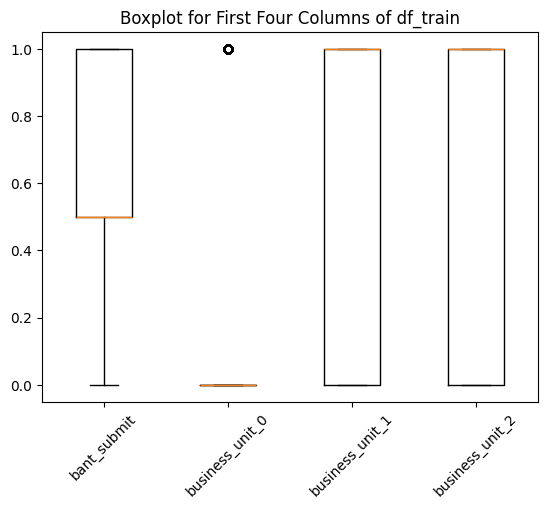

In [3037]:
import matplotlib.pyplot as plt

# 첫 번째부터 네 번째 칼럼까지의 데이터만 추출
subset_df = df_train.iloc[:, :4]

# boxplot 그리기
plt.boxplot(subset_df.values, labels=subset_df.columns)
plt.title("Boxplot for First Four Columns of df_train")
plt.xticks(rotation=45)
plt.show()


In [3038]:
# ------------------------------------------------------------------------------------------------------

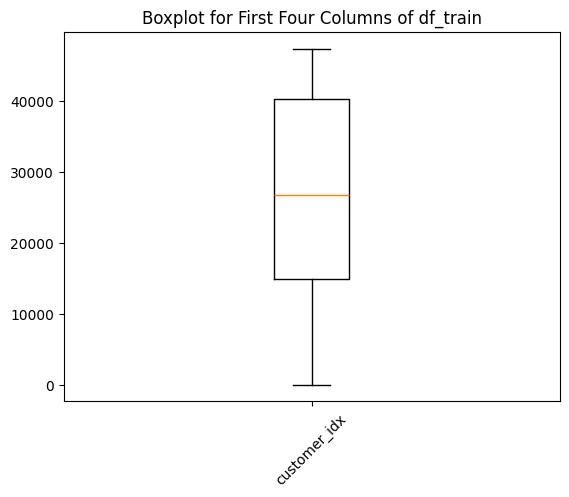

In [3039]:
import matplotlib.pyplot as plt

# 첫 번째부터 네 번째 칼럼까지의 데이터만 추출
subset_df = df_train.iloc[:,4:5]

# boxplot 그리기
plt.boxplot(subset_df.values, labels=subset_df.columns)
plt.title("Boxplot for First Four Columns of df_train")
plt.xticks(rotation=45)
plt.show()


Skewness: -0.13806705960822785


C:\Users\bumju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


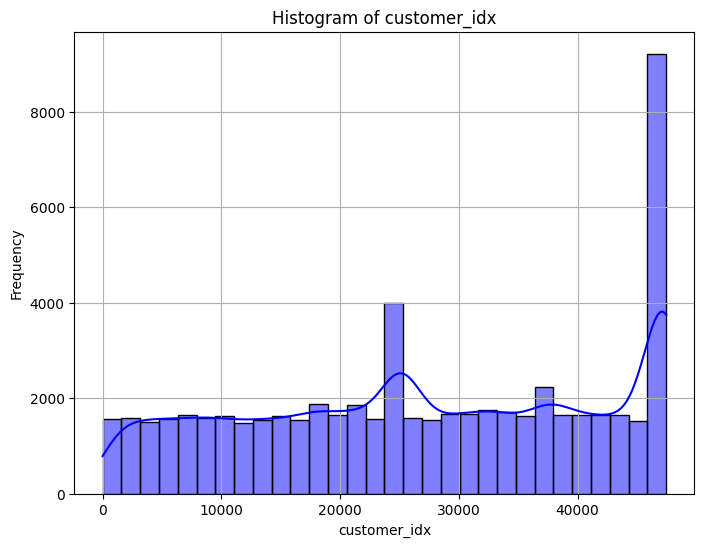

In [3040]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터의 왜도 계산
skewness = df_train['customer_idx'].skew()
print("Skewness:", skewness)

# 히스토그램 시각화
plt.figure(figsize=(8, 6))
sns.histplot(df_train['customer_idx'], kde=True, color='blue', bins=30)
plt.title('Histogram of customer_idx')
plt.xlabel('customer_idx')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [3041]:
# ------------------------------------------------------------------------------------------------------

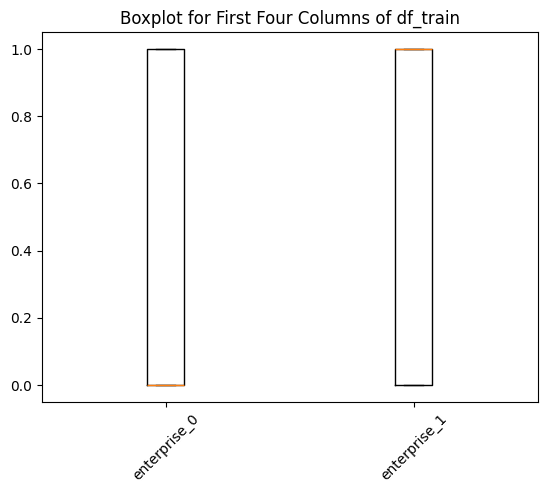

In [3042]:
import matplotlib.pyplot as plt

# 첫 번째부터 네 번째 칼럼까지의 데이터만 추출
subset_df = df_train.iloc[:,5:7]

# boxplot 그리기
plt.boxplot(subset_df.values, labels=subset_df.columns)
plt.title("Boxplot for First Four Columns of df_train")
plt.xticks(rotation=45)
plt.show()

In [3043]:
# ------------------------------------------------------------------------------------------------------

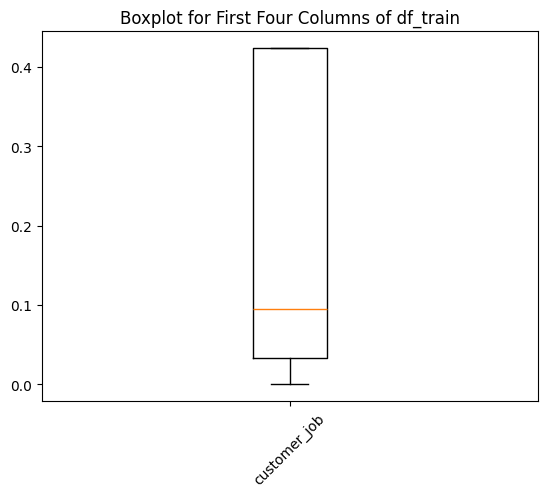

In [3044]:
import matplotlib.pyplot as plt

# 첫 번째부터 네 번째 칼럼까지의 데이터만 추출
subset_df = df_train.iloc[:,7:8]

# boxplot 그리기
plt.boxplot(subset_df.values, labels=subset_df.columns)
plt.title("Boxplot for First Four Columns of df_train")
plt.xticks(rotation=45)
plt.show()

Skewness: 0.27067236916595505


C:\Users\bumju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


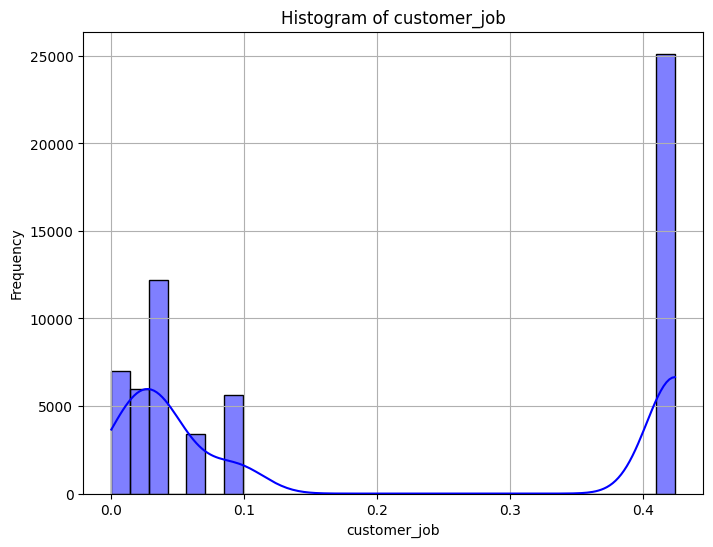

In [3045]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터의 왜도 계산
skewness = df_train['customer_job'].skew()
print("Skewness:", skewness)

# 히스토그램 시각화
plt.figure(figsize=(8, 6))
sns.histplot(df_train['customer_job'], kde=True, color='blue', bins=30)
plt.title('Histogram of customer_job')
plt.xlabel('customer_job')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [3046]:
# ------------------------------------------------------------------------------------------------------

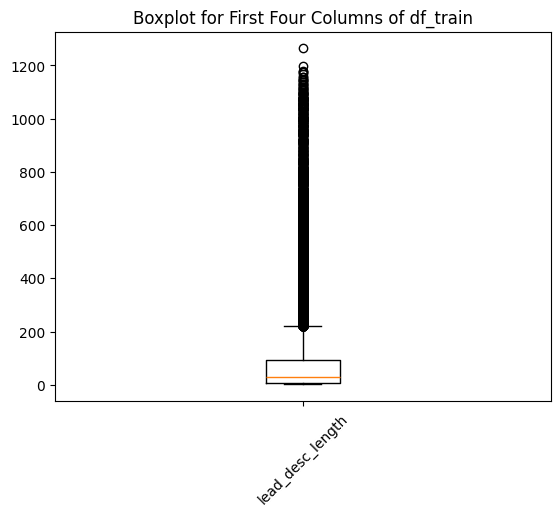

In [3047]:
import matplotlib.pyplot as plt

# 첫 번째부터 네 번째 칼럼까지의 데이터만 추출
subset_df = df_train.iloc[:,8:9]

# boxplot 그리기
plt.boxplot(subset_df.values, labels=subset_df.columns)
plt.title("Boxplot for First Four Columns of df_train")
plt.xticks(rotation=45)
plt.show()

Skewness: 3.6236507740674346


C:\Users\bumju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


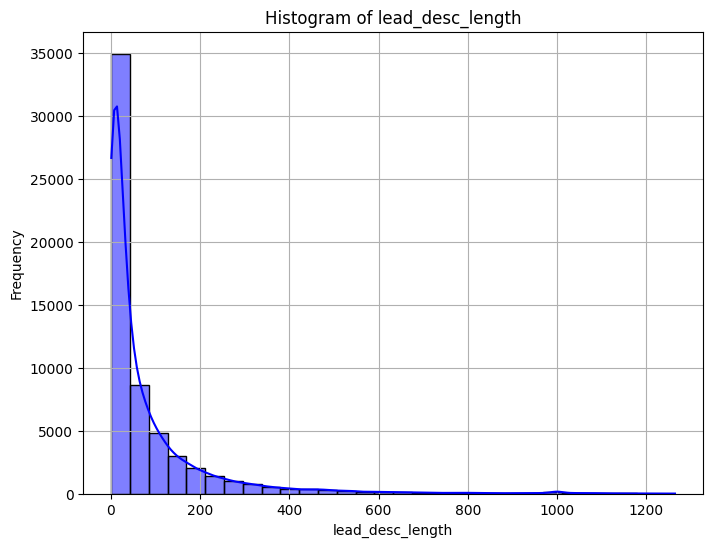

In [3048]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터의 왜도 계산
skewness = df_train['lead_desc_length'].skew()
print("Skewness:", skewness)

# 히스토그램 시각화
plt.figure(figsize=(8, 6))
sns.histplot(df_train['lead_desc_length'], kde=True, color='blue', bins=30)
plt.title('Histogram of lead_desc_length')
plt.xlabel('lead_desc_length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [3049]:
import pandas as pd

# IQR 기반으로 이상치를 탐지합니다.
Q1 = df_train['lead_desc_length'].quantile(0.25)
Q3 = df_train['lead_desc_length'].quantile(0.75)
IQR = Q3 - Q1

# 이상치의 범위를 계산합니다. 이상치는 보통 IQR의 1.5배보다 위(또는 아래)에 있는 값들로 정의됩니다.
outlier_range_low = Q1 - 1.5 * IQR
outlier_range_high = Q3 + 1.5 * IQR

(outlier_range_low, outlier_range_high)



(-120.5, 219.5)

In [3050]:
# 'lead_desc_length' 열에서 값이 220 미만인 행의 개수
count_below_220 = len(df_train[df_train['lead_desc_length'] < 220])

# 'lead_desc_length' 열에서 값이 220 이상인 행의 개수
count_above_220 = len(df_train[df_train['lead_desc_length'] >= 220])

print("lead_desc_length 값이 220 미만인 행의 개수:", count_below_220)
print("lead_desc_length 값이 220 이상인 행의 개수:", count_above_220)


lead_desc_length 값이 220 미만인 행의 개수: 53741
lead_desc_length 값이 220 이상인 행의 개수: 5558


In [3051]:
# # 'lead_desc_length' 값이 220 이상이고 'is_converted' 값이 False인 행 제거
# df_train = df_train.drop(df_train[(df_train['lead_desc_length'] >= 220) & (df_train['is_converted'] == False)].index)


In [3052]:
# import matplotlib.pyplot as plt

# # 첫 번째부터 네 번째 칼럼까지의 데이터만 추출
# subset_df = df_train.iloc[:,8:9]

# # boxplot 그리기
# plt.boxplot(subset_df.values, labels=subset_df.columns)
# plt.title("Boxplot for First Four Columns of df_train")
# plt.xticks(rotation=45)
# plt.show()

In [3053]:
# ------------------------------------------------------------------------------------------------------

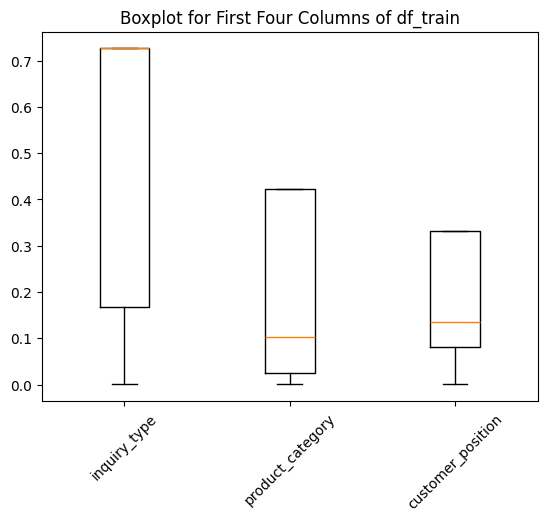

In [3054]:
import matplotlib.pyplot as plt

# 첫 번째부터 네 번째 칼럼까지의 데이터만 추출
subset_df = df_train.iloc[:,9:12]

# boxplot 그리기
plt.boxplot(subset_df.values, labels=subset_df.columns)
plt.title("Boxplot for First Four Columns of df_train")
plt.xticks(rotation=45)
plt.show()

Skewness of inquiry_type: -1.0854960527745652
Skewness of product_category: 0.2640514721251282
Skewness of customer_position: 0.36329956078198256


C:\Users\bumju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


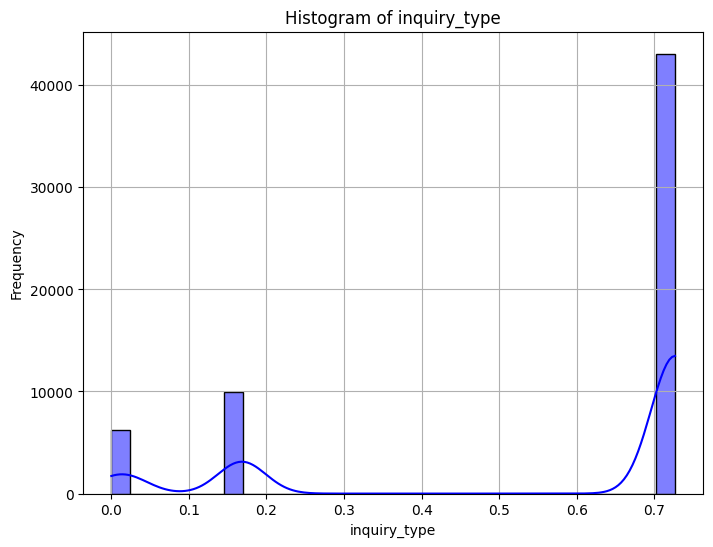

C:\Users\bumju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


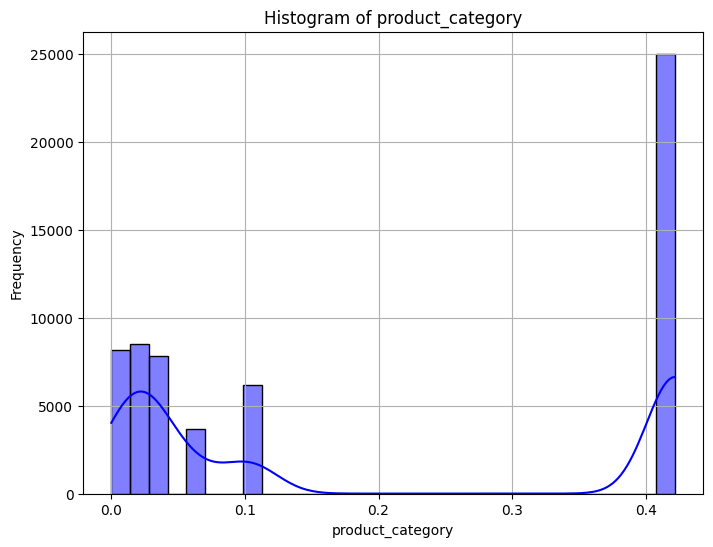

C:\Users\bumju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


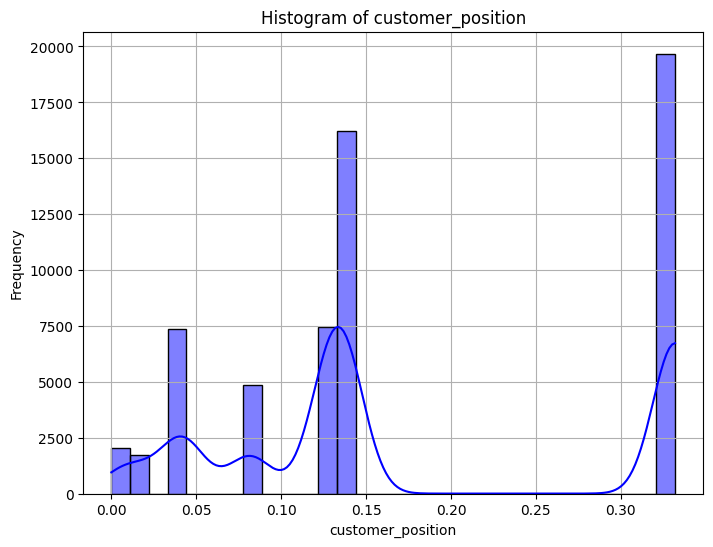

In [3055]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 칼럼에 대해 왜도 계산
skewness_inquiry_type = df_train['inquiry_type'].skew()
skewness_product_category = df_train['product_category'].skew()
skewness_customer_position = df_train['customer_position'].skew()

print("Skewness of inquiry_type:", skewness_inquiry_type)
print("Skewness of product_category:", skewness_product_category)
print("Skewness of customer_position:", skewness_customer_position)

# inquiry_type 칼럼에 대한 히스토그램 시각화
plt.figure(figsize=(8, 6))
sns.histplot(df_train['inquiry_type'], kde=True, color='blue', bins=30)
plt.title('Histogram of inquiry_type')
plt.xlabel('inquiry_type')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# product_category 칼럼에 대한 히스토그램 시각화
plt.figure(figsize=(8, 6))
sns.histplot(df_train['product_category'], kde=True, color='blue', bins=30)
plt.title('Histogram of product_category')
plt.xlabel('product_category')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# customer_position 칼럼에 대한 히스토그램 시각화
plt.figure(figsize=(8, 6))
sns.histplot(df_train['customer_position'], kde=True, color='blue', bins=30)
plt.title('Histogram of customer_position')
plt.xlabel('customer_position')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [3056]:
# ------------------------------------------------------------------------------------------------------

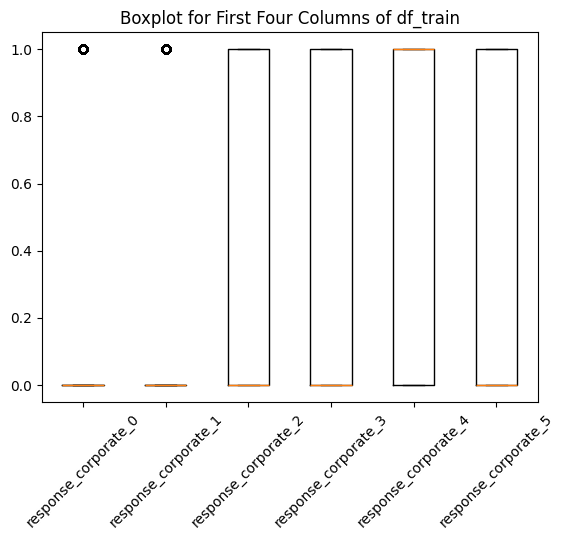

In [3057]:
import matplotlib.pyplot as plt

# 첫 번째부터 네 번째 칼럼까지의 데이터만 추출
subset_df = df_train.iloc[:,12:18]

# boxplot 그리기
plt.boxplot(subset_df.values, labels=subset_df.columns)
plt.title("Boxplot for First Four Columns of df_train")
plt.xticks(rotation=45)
plt.show()

In [3058]:
# ------------------------------------------------------------------------------------------------------

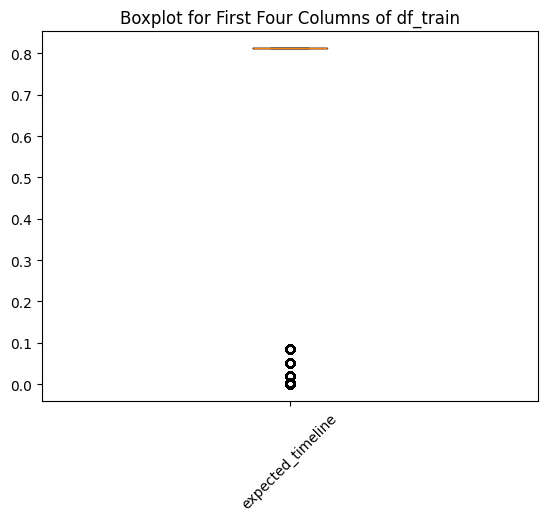

In [3059]:
import matplotlib.pyplot as plt

# 첫 번째부터 네 번째 칼럼까지의 데이터만 추출
subset_df = df_train.iloc[:,18:19]

# boxplot 그리기
plt.boxplot(subset_df.values, labels=subset_df.columns)
plt.title("Boxplot for First Four Columns of df_train")
plt.xticks(rotation=45)
plt.show()

Skewness: -1.6107236428415412


C:\Users\bumju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


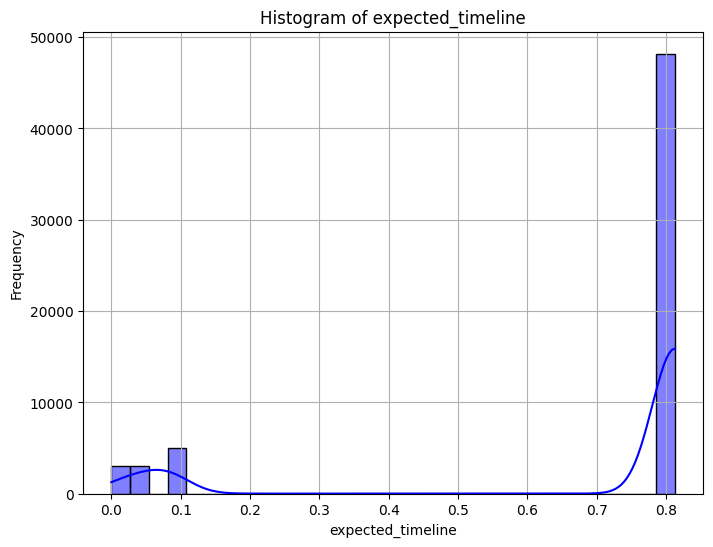

In [3060]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'expected_timeline' 칼럼의 왜도 계산
skewness = df_train['expected_timeline'].skew()
print("Skewness:", skewness)

# 'expected_timeline' 칼럼에 대한 히스토그램 시각화
plt.figure(figsize=(8, 6))
sns.histplot(df_train['expected_timeline'], kde=True, color='blue', bins=30)
plt.title('Histogram of expected_timeline')
plt.xlabel('expected_timeline')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [3061]:
import pandas as pd

# IQR 기반으로 이상치를 탐지합니다.
Q1 = df_train['expected_timeline'].quantile(0.25)
Q3 = df_train['expected_timeline'].quantile(0.75)
IQR = Q3 - Q1

# 이상치의 범위를 계산합니다. 이상치는 보통 IQR의 1.5배보다 위(또는 아래)에 있는 값들로 정의됩니다.
outlier_range_low = Q1 - 1.5 * IQR
outlier_range_high = Q3 + 1.5 * IQR

(outlier_range_low, outlier_range_high)

(0.8127287138063036, 0.8127287138063036)

In [3062]:
# 'expected_timeline' 열에서 값이 48194 미만인 행의 개수
count_below_48194 = len(df_train[df_train['expected_timeline'] < 48194])

# 'expected_timeline' 열에서 값이 48194 이상인 행의 개수
count_above_48194 = len(df_train[df_train['expected_timeline'] >= 48194])

print("expected_timeline 값이 48194 미만인 행의 개수:", count_below_48194)
print("expected_timeline 값이 48194 이상인 행의 개수:", count_above_48194)


expected_timeline 값이 48194 미만인 행의 개수: 59299
expected_timeline 값이 48194 이상인 행의 개수: 0


In [3063]:
# ------------------------------------------------------------------------------------------------------

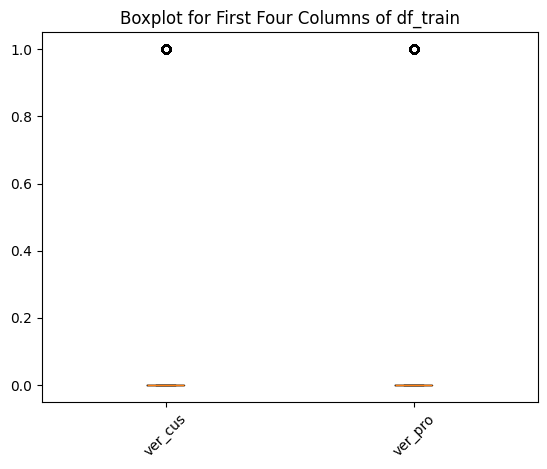

In [3064]:
import matplotlib.pyplot as plt

# 첫 번째부터 네 번째 칼럼까지의 데이터만 추출
subset_df = df_train.iloc[:,19:21]

# boxplot 그리기
plt.boxplot(subset_df.values, labels=subset_df.columns)
plt.title("Boxplot for First Four Columns of df_train")
plt.xticks(rotation=45)
plt.show()

In [3065]:
# ------------------------------------------------------------------------------------------------------

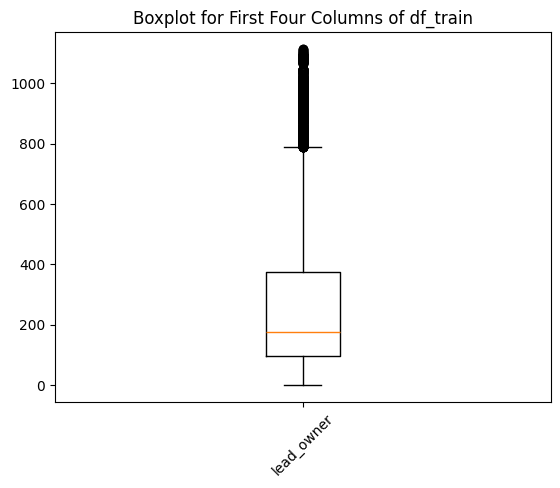

In [3066]:
import matplotlib.pyplot as plt

# 첫 번째부터 네 번째 칼럼까지의 데이터만 추출
subset_df = df_train.iloc[:,21:22]

# boxplot 그리기
plt.boxplot(subset_df.values, labels=subset_df.columns)
plt.title("Boxplot for First Four Columns of df_train")
plt.xticks(rotation=45)
plt.show()

Skewness: 1.2701249943617767


C:\Users\bumju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


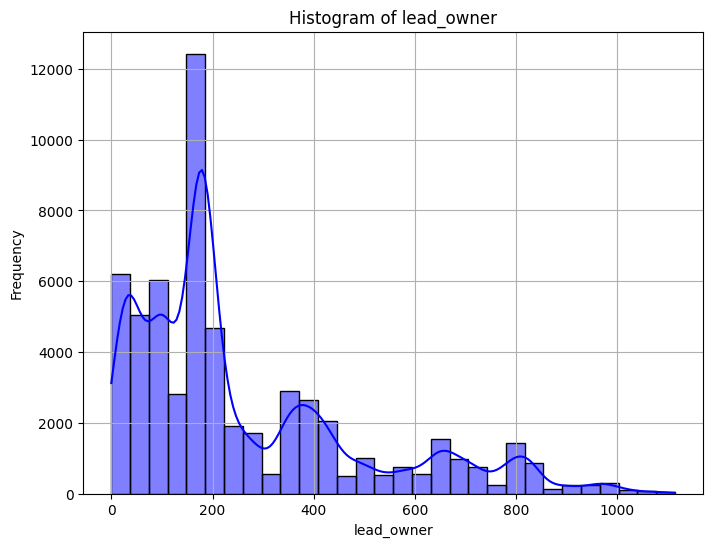

In [3067]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'lead_owner' 칼럼의 왜도 계산
skewness = df_train['lead_owner'].skew()
print("Skewness:", skewness)

# 'lead_owner' 칼럼에 대한 히스토그램 시각화
plt.figure(figsize=(8, 6))
sns.histplot(df_train['lead_owner'], kde=True, color='blue', bins=30)
plt.title('Histogram of lead_owner')
plt.xlabel('lead_owner')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [3068]:
import pandas as pd

# 'lead_owner' 칼럼에 대한 이상치를 탐지합니다.
Q1 = df_train['lead_owner'].quantile(0.25)
Q3 = df_train['lead_owner'].quantile(0.75)
IQR = Q3 - Q1

# 이상치의 범위를 계산합니다. 이상치는 보통 IQR의 1.5배보다 위(또는 아래)에 있는 값들로 정의됩니다.
outlier_range_low = Q1 - 1.5 * IQR
outlier_range_high = Q3 + 1.5 * IQR

(outlier_range_low, outlier_range_high)


(-318.5, 789.5)

In [3069]:
# ------------------------------------------------------------------------------------------------------

In [3070]:
value = 790

# 'lead_owner' 열에서 값이 특정 값 미만인 행의 개수
count_below_value = len(df_train[df_train['lead_owner'] < value])

# 'lead_owner' 열에서 값이 특정 값 이상인 행의 개수
count_above_value = len(df_train[df_train['lead_owner'] >= value])

print("lead_owner 값이 {} 미만인 행의 개수:".format(value), count_below_value)
print("lead_owner 값이 {} 이상인 행의 개수:".format(value), count_above_value)



lead_owner 값이 790 미만인 행의 개수: 56589
lead_owner 값이 790 이상인 행의 개수: 2710


In [3071]:
# ------------------------------------------------------------------------------------------------------

In [3072]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bant_submit           59299 non-null  float64
 1   business_unit_0       59299 non-null  int64  
 2   business_unit_1       59299 non-null  int64  
 3   business_unit_2       59299 non-null  int64  
 4   customer_idx          59299 non-null  int64  
 5   enterprise_0          59299 non-null  int64  
 6   enterprise_1          59299 non-null  int64  
 7   customer_job          59299 non-null  float64
 8   lead_desc_length      59299 non-null  int64  
 9   inquiry_type          59299 non-null  float64
 10  product_category      59299 non-null  float64
 11  customer_position     59299 non-null  float64
 12  response_corporate_0  59299 non-null  int64  
 13  response_corporate_1  59299 non-null  int64  
 14  response_corporate_2  59299 non-null  int64  
 15  response_corporate_

In [3073]:
# ------------------------------------------------------------------------------------------------------

In [3074]:
target = df_train['is_converted']

In [3075]:
target

0         True
1         True
2         True
3         True
4         True
         ...  
59294    False
59295    False
59296    False
59297    False
59298    False
Name: is_converted, Length: 59299, dtype: bool

In [3076]:
columns_to_encode = ['customer_job', 'inquiry_type', 'product_category', 'customer_position', 'expected_timeline']
df_train_encode = df_train[columns_to_encode]
df_test_encode = df_test[columns_to_encode]

In [3077]:
df_train

,bant_submit,business_unit_0,business_unit_1,business_unit_2,customer_idx,enterprise_0,enterprise_1,customer_job,lead_desc_length,inquiry_type,...,response_corporate_1,response_corporate_2,response_corporate_3,response_corporate_4,response_corporate_5,expected_timeline,ver_cus,ver_pro,lead_owner,is_converted
0,1.00,0,0,1,32160,0,1,0.033103,62,0.726471,...,0,0,0,0,1,0.812729,1,0,0,True
1,1.00,0,0,1,23122,0,1,0.011956,96,0.726471,...,0,0,0,0,1,0.812729,1,0,1,True
2,1.00,0,0,1,1755,0,1,0.423717,56,0.020860,...,0,0,0,1,0,0.812729,1,0,2,True
3,1.00,0,0,1,4919,0,1,0.020102,44,0.726471,...,0,0,0,1,0,0.812729,1,0,3,True
4,1.00,0,0,1,17126,0,1,0.023188,97,0.726471,...,0,0,0,1,0,0.812729,0,0,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,0,0,1,33747,1,0,0.423717,200,0.020860,...,1,1,1,0,0,0.084976,0,0,694,False
59295,0.75,0,0,1,35420,0,1,0.020102,70,0.726471,...,0,1,0,1,0,0.018685,0,0,39,False
59296,0.75,0,0,1,19249,0,1,0.423717,34,0.726471,...,1,1,0,0,0,0.812729,0,0,125,False
59297,1.00,0,0,1,40327,0,1,0.020102,377,0.726471,...,1,1,0,0,0,0.051046,0,0,134,False


In [3081]:
from sklearn.preprocessing import MinMaxScaler

# 데이터셋 예시 (실제 데이터셋에 맞게 조정 필요)
# df_train = pd.DataFrame(...)
# df_test = pd.DataFrame(...)

df_train = df_train.drop(columns = 'is_converted')
df_test = df_test.drop(columns = 'is_converted')


columns_not_to_scale = ['customer_job', 'inquiry_type', 'product_category', 'customer_position', 'expected_timeline', 'is_converted']

# 스케일링할 칼럼 선택
columns_to_scale = [col for col in df_train.columns if col not in columns_not_to_scale]

# MinMaxScaler 적용
minmax_scaler = MinMaxScaler()
df_train_scaled = df_train.copy()
df_test_scaled = df_test.copy()

df_train_scaled[columns_to_scale] = minmax_scaler.fit_transform(df_train[columns_to_scale])
df_test_scaled[columns_to_scale] = minmax_scaler.transform(df_test[columns_to_scale])

# 변환된 데이터셋 확인 (예시)
print(df_train_scaled.head())
print(df_test_scaled.head())



   bant_submit  business_unit_0  business_unit_1  business_unit_2  \
0          1.0              0.0              0.0              1.0   
1          1.0              0.0              0.0              1.0   
2          1.0              0.0              0.0              1.0   
3          1.0              0.0              0.0              1.0   
4          1.0              0.0              0.0              1.0   

   customer_idx  enterprise_0  enterprise_1  customer_job  lead_desc_length  \
0      0.677524           0.0           1.0      0.033103          0.048298   
1      0.487106           0.0           1.0      0.011956          0.075218   
2      0.036933           0.0           1.0      0.423717          0.043547   
3      0.103594           0.0           1.0      0.020102          0.034046   
4      0.360779           0.0           1.0      0.023188          0.076010   

   inquiry_type  ...  response_corporate_0  response_corporate_1  \
0      0.726471  ...                   0.0

In [3082]:
df_train_scaled

,bant_submit,business_unit_0,business_unit_1,business_unit_2,customer_idx,enterprise_0,enterprise_1,customer_job,lead_desc_length,inquiry_type,...,response_corporate_0,response_corporate_1,response_corporate_2,response_corporate_3,response_corporate_4,response_corporate_5,expected_timeline,ver_cus,ver_pro,lead_owner
0,1.00,0.0,0.0,1.0,0.677524,0.0,1.0,0.033103,0.048298,0.726471,...,0.0,0.0,0.0,0.0,0.0,1.0,0.812729,1.0,0.0,0.000000
1,1.00,0.0,0.0,1.0,0.487106,0.0,1.0,0.011956,0.075218,0.726471,...,0.0,0.0,0.0,0.0,0.0,1.0,0.812729,1.0,0.0,0.000898
2,1.00,0.0,0.0,1.0,0.036933,0.0,1.0,0.423717,0.043547,0.020860,...,0.0,0.0,0.0,0.0,1.0,0.0,0.812729,1.0,0.0,0.001795
3,1.00,0.0,0.0,1.0,0.103594,0.0,1.0,0.020102,0.034046,0.726471,...,0.0,0.0,0.0,0.0,1.0,0.0,0.812729,1.0,0.0,0.002693
4,1.00,0.0,0.0,1.0,0.360779,0.0,1.0,0.023188,0.076010,0.726471,...,0.0,0.0,0.0,0.0,1.0,0.0,0.812729,0.0,0.0,0.003591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,0.0,0.0,1.0,0.710960,1.0,0.0,0.423717,0.157561,0.020860,...,0.0,1.0,1.0,1.0,0.0,0.0,0.084976,0.0,0.0,0.622980
59295,0.75,0.0,0.0,1.0,0.746208,0.0,1.0,0.020102,0.054632,0.726471,...,0.0,0.0,1.0,0.0,1.0,0.0,0.018685,0.0,0.0,0.035009
59296,0.75,0.0,0.0,1.0,0.405507,0.0,1.0,0.423717,0.026128,0.726471,...,0.0,1.0,1.0,0.0,0.0,0.0,0.812729,0.0,0.0,0.112208
59297,1.00,0.0,0.0,1.0,0.849591,0.0,1.0,0.020102,0.297704,0.726471,...,0.0,1.0,1.0,0.0,0.0,0.0,0.051046,0.0,0.0,0.120287


In [3084]:
df_test_scaled

,bant_submit,business_unit_0,business_unit_1,business_unit_2,customer_idx,enterprise_0,enterprise_1,customer_job,lead_desc_length,inquiry_type,...,response_corporate_0,response_corporate_1,response_corporate_2,response_corporate_3,response_corporate_4,response_corporate_5,expected_timeline,ver_cus,ver_pro,lead_owner
0,0.00,0.0,1.0,0.0,1.000000,0.0,1.0,0.023188,0.001584,0.726471,...,0.0,0.0,0.0,1.0,1.0,0.0,0.812729,1.0,0.0,0.249551
1,0.25,0.0,1.0,1.0,0.113834,1.0,0.0,0.423717,0.017419,0.726471,...,0.0,0.0,1.0,0.0,0.0,1.0,0.812729,0.0,0.0,0.392280
2,1.00,0.0,1.0,0.0,0.286428,1.0,0.0,0.032918,0.108472,0.726471,...,0.0,0.0,0.0,1.0,1.0,1.0,0.812729,0.0,0.0,0.784560
3,0.50,0.0,1.0,0.0,0.362422,0.0,1.0,0.037606,0.001584,0.726471,...,0.0,0.0,1.0,0.0,0.0,1.0,0.051046,0.0,0.0,0.174147
4,1.00,0.0,1.0,0.0,0.049027,0.0,1.0,0.423717,0.083927,0.726471,...,0.0,0.0,0.0,1.0,1.0,0.0,0.812729,1.0,1.0,0.149910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,0.50,0.0,0.0,1.0,0.848854,0.0,1.0,0.037606,0.004751,0.726471,...,0.0,0.0,0.0,1.0,1.0,0.0,0.812729,0.0,0.0,0.087074
5267,0.25,0.0,1.0,1.0,1.000000,0.0,1.0,0.423717,0.123515,0.726471,...,0.0,0.0,1.0,0.0,0.0,1.0,0.812729,0.0,0.0,0.393178
5268,0.75,0.0,0.0,1.0,0.973896,0.0,1.0,0.020102,0.030087,0.726471,...,0.0,0.0,0.0,1.0,1.0,0.0,0.812729,0.0,0.0,0.087074
5269,0.00,0.0,1.0,1.0,0.962098,1.0,0.0,0.423717,0.001584,0.726471,...,0.0,1.0,1.0,0.0,0.0,1.0,0.812729,0.0,0.0,0.385099


In [3085]:
df_train_minmax = df_train_scaled
df_test_minmax = df_test_scaled

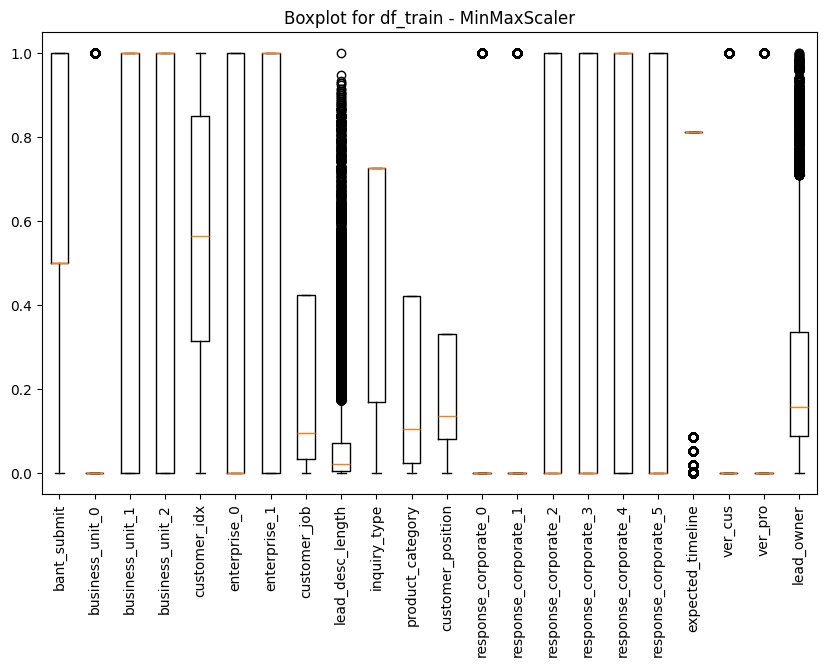

In [3086]:
# Boxplot 그리기 - MinMaxScaler
plt.figure(figsize=(10, 6))
plt.boxplot(df_train_minmax, labels=df_train.columns)
plt.title("Boxplot for df_train - MinMaxScaler")
plt.xticks(rotation=90)
plt.show()



Skewness: 0.27067236916595505


C:\Users\bumju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


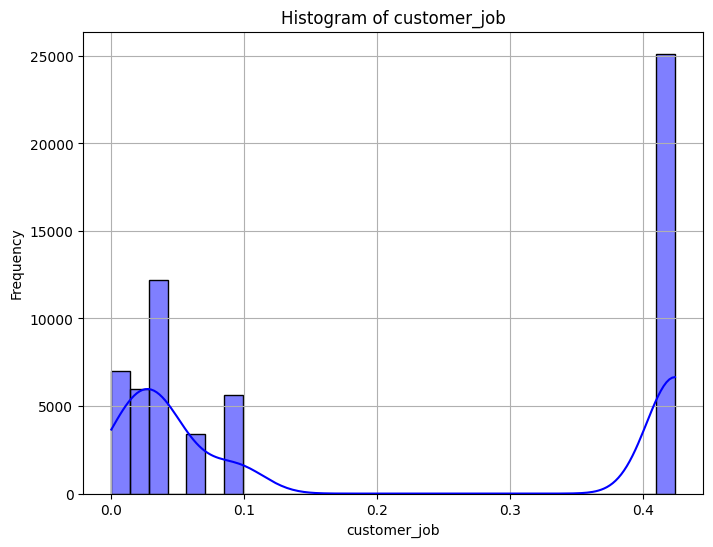

In [3088]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터의 왜도 계산
skewness = df_train_minmax['customer_job'].skew()
print("Skewness:", skewness)

# 히스토그램 시각화
plt.figure(figsize=(8, 6))
sns.histplot(df_train_minmax['customer_job'], kde=True, color='blue', bins=30)
plt.title('Histogram of customer_job')
plt.xlabel('customer_job')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [3089]:
df_train_minmax

,bant_submit,business_unit_0,business_unit_1,business_unit_2,customer_idx,enterprise_0,enterprise_1,customer_job,lead_desc_length,inquiry_type,...,response_corporate_0,response_corporate_1,response_corporate_2,response_corporate_3,response_corporate_4,response_corporate_5,expected_timeline,ver_cus,ver_pro,lead_owner
0,1.00,0.0,0.0,1.0,0.677524,0.0,1.0,0.033103,0.048298,0.726471,...,0.0,0.0,0.0,0.0,0.0,1.0,0.812729,1.0,0.0,0.000000
1,1.00,0.0,0.0,1.0,0.487106,0.0,1.0,0.011956,0.075218,0.726471,...,0.0,0.0,0.0,0.0,0.0,1.0,0.812729,1.0,0.0,0.000898
2,1.00,0.0,0.0,1.0,0.036933,0.0,1.0,0.423717,0.043547,0.020860,...,0.0,0.0,0.0,0.0,1.0,0.0,0.812729,1.0,0.0,0.001795
3,1.00,0.0,0.0,1.0,0.103594,0.0,1.0,0.020102,0.034046,0.726471,...,0.0,0.0,0.0,0.0,1.0,0.0,0.812729,1.0,0.0,0.002693
4,1.00,0.0,0.0,1.0,0.360779,0.0,1.0,0.023188,0.076010,0.726471,...,0.0,0.0,0.0,0.0,1.0,0.0,0.812729,0.0,0.0,0.003591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,0.0,0.0,1.0,0.710960,1.0,0.0,0.423717,0.157561,0.020860,...,0.0,1.0,1.0,1.0,0.0,0.0,0.084976,0.0,0.0,0.622980
59295,0.75,0.0,0.0,1.0,0.746208,0.0,1.0,0.020102,0.054632,0.726471,...,0.0,0.0,1.0,0.0,1.0,0.0,0.018685,0.0,0.0,0.035009
59296,0.75,0.0,0.0,1.0,0.405507,0.0,1.0,0.423717,0.026128,0.726471,...,0.0,1.0,1.0,0.0,0.0,0.0,0.812729,0.0,0.0,0.112208
59297,1.00,0.0,0.0,1.0,0.849591,0.0,1.0,0.020102,0.297704,0.726471,...,0.0,1.0,1.0,0.0,0.0,0.0,0.051046,0.0,0.0,0.120287


In [3090]:
df_train_minmax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bant_submit           59299 non-null  float64
 1   business_unit_0       59299 non-null  float64
 2   business_unit_1       59299 non-null  float64
 3   business_unit_2       59299 non-null  float64
 4   customer_idx          59299 non-null  float64
 5   enterprise_0          59299 non-null  float64
 6   enterprise_1          59299 non-null  float64
 7   customer_job          59299 non-null  float64
 8   lead_desc_length      59299 non-null  float64
 9   inquiry_type          59299 non-null  float64
 10  product_category      59299 non-null  float64
 11  customer_position     59299 non-null  float64
 12  response_corporate_0  59299 non-null  float64
 13  response_corporate_1  59299 non-null  float64
 14  response_corporate_2  59299 non-null  float64
 15  response_corporate_

In [3091]:
df_test_minmax

,bant_submit,business_unit_0,business_unit_1,business_unit_2,customer_idx,enterprise_0,enterprise_1,customer_job,lead_desc_length,inquiry_type,...,response_corporate_0,response_corporate_1,response_corporate_2,response_corporate_3,response_corporate_4,response_corporate_5,expected_timeline,ver_cus,ver_pro,lead_owner
0,0.00,0.0,1.0,0.0,1.000000,0.0,1.0,0.023188,0.001584,0.726471,...,0.0,0.0,0.0,1.0,1.0,0.0,0.812729,1.0,0.0,0.249551
1,0.25,0.0,1.0,1.0,0.113834,1.0,0.0,0.423717,0.017419,0.726471,...,0.0,0.0,1.0,0.0,0.0,1.0,0.812729,0.0,0.0,0.392280
2,1.00,0.0,1.0,0.0,0.286428,1.0,0.0,0.032918,0.108472,0.726471,...,0.0,0.0,0.0,1.0,1.0,1.0,0.812729,0.0,0.0,0.784560
3,0.50,0.0,1.0,0.0,0.362422,0.0,1.0,0.037606,0.001584,0.726471,...,0.0,0.0,1.0,0.0,0.0,1.0,0.051046,0.0,0.0,0.174147
4,1.00,0.0,1.0,0.0,0.049027,0.0,1.0,0.423717,0.083927,0.726471,...,0.0,0.0,0.0,1.0,1.0,0.0,0.812729,1.0,1.0,0.149910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,0.50,0.0,0.0,1.0,0.848854,0.0,1.0,0.037606,0.004751,0.726471,...,0.0,0.0,0.0,1.0,1.0,0.0,0.812729,0.0,0.0,0.087074
5267,0.25,0.0,1.0,1.0,1.000000,0.0,1.0,0.423717,0.123515,0.726471,...,0.0,0.0,1.0,0.0,0.0,1.0,0.812729,0.0,0.0,0.393178
5268,0.75,0.0,0.0,1.0,0.973896,0.0,1.0,0.020102,0.030087,0.726471,...,0.0,0.0,0.0,1.0,1.0,0.0,0.812729,0.0,0.0,0.087074
5269,0.00,0.0,1.0,1.0,0.962098,1.0,0.0,0.423717,0.001584,0.726471,...,0.0,1.0,1.0,0.0,0.0,1.0,0.812729,0.0,0.0,0.385099


In [3092]:
converted_counts = target.value_counts()

print("False 값 개수:", converted_counts[False])
print("True 값 개수:", converted_counts[True])

False 값 개수: 54449
True 값 개수: 4850


In [3093]:
# ------------------------------------------------------------------------------------------------------

In [3094]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# 예시 데이터셋
# df_train = pd.DataFrame(...)

# 타겟 변수와 특성 분리
X = df_train_minmax
y = target

# Random UnderSampler 인스턴스 생성
rus = RandomUnderSampler(random_state=42)

# Random UnderSampling 적용
X_resampled, y_resampled = rus.fit_resample(X, y)

# 결과 데이터프레임 생성
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['is_converted'] = y_resampled

df_train_minmax = df_resampled

In [3095]:
# df_train_minmax['is_converted'] = target

In [3096]:
df_train_minmax

,bant_submit,business_unit_0,business_unit_1,business_unit_2,customer_idx,enterprise_0,enterprise_1,customer_job,lead_desc_length,inquiry_type,...,response_corporate_1,response_corporate_2,response_corporate_3,response_corporate_4,response_corporate_5,expected_timeline,ver_cus,ver_pro,lead_owner,is_converted
0,0.25,0.0,0.0,1.0,1.000000,0.0,1.0,0.423717,0.001584,0.168249,...,0.0,1.0,0.0,1.0,1.0,0.812729,0.0,0.0,0.631957,False
1,0.75,0.0,1.0,0.0,1.000000,0.0,1.0,0.423717,0.026128,0.726471,...,0.0,0.0,0.0,1.0,0.0,0.812729,0.0,0.0,0.156194,False
2,0.25,0.0,0.0,1.0,1.000000,0.0,1.0,0.423717,0.134600,0.726471,...,1.0,1.0,1.0,0.0,0.0,0.812729,0.0,0.0,0.622980,False
3,1.00,0.0,1.0,0.0,0.939259,0.0,1.0,0.038668,0.123515,0.726471,...,0.0,0.0,0.0,1.0,0.0,0.812729,1.0,0.0,0.156194,False
4,1.00,0.0,0.0,1.0,0.389790,1.0,0.0,0.423717,0.304038,0.726471,...,0.0,0.0,1.0,1.0,0.0,0.812729,0.0,0.0,0.020646,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,0.75,0.0,1.0,0.0,0.346389,1.0,0.0,0.033340,0.001584,0.726471,...,1.0,1.0,1.0,1.0,1.0,0.812729,0.0,0.0,0.309695,True
9696,1.00,0.0,1.0,0.0,0.221389,1.0,0.0,0.022142,0.083927,0.726471,...,1.0,1.0,1.0,1.0,1.0,0.812729,0.0,0.0,0.309695,True
9697,1.00,0.0,0.0,1.0,0.648133,0.0,1.0,0.423717,0.862233,0.726471,...,0.0,0.0,1.0,1.0,0.0,0.018516,0.0,0.0,0.438061,True
9698,1.00,0.0,0.0,1.0,0.402811,0.0,1.0,0.423717,0.113222,0.726471,...,0.0,0.0,1.0,1.0,0.0,0.018516,0.0,0.0,0.557451,True


In [3097]:
converted_counts = df_train_minmax['is_converted'].value_counts()

print("False 값 개수:", converted_counts[False])
print("True 값 개수:", converted_counts[True])

False 값 개수: 4850
True 값 개수: 4850


In [3098]:
# ------------------------------------------------------------------------------------------------------

In [3099]:
# import pandas as pd
# import xgboost as xgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, f1_score

# # 데이터셋 로드
# # df_train = ...  # df_train 데이터셋 로드


# # 훈련 데이터와 테스트 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X_train_lda, y_train, test_size=0.2, random_state=42)

# model_xgb = xgb.XGBClassifier(
#     objective='binary:logistic',  # 이진 분류 문제
#     eval_metric='logloss',        # 평가 지표
#     random_state=42,
# )

# # 모델 훈련
# model_xgb.fit(X_train, y_train)

# # 예측
# y_pred = model_xgb.predict(X_test)

# # 평가
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Accuracy: %.2f%%" % (accuracy * 100.0))
# print("F1 Score:", f1)

In [3103]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

# 데이터셋 로드
# df_train = ...  # df_train 데이터셋 로드

target = 'is_converted'

# 특성과 타겟 변수 분리
X = df_train_minmax.drop(target, axis=1)
y = df_train_minmax[target]

# 훈련 데이터와 테스트 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# XGBoost 분류기에 클래스 가중치 적용
xgb1 = XGBClassifier(n_estimators=100, learning_rate=0.3, objective='binary:logistic', eval_metric='logloss', random_state=41)
xgb2 = XGBClassifier(n_estimators=200, learning_rate=0.2, objective='binary:logistic', eval_metric='logloss', random_state=41)
xgb3 = XGBClassifier(n_estimators=300, learning_rate=0.1, objective='binary:logistic', eval_metric='logloss', random_state=41)
xgb4 = XGBClassifier(n_estimators=400, learning_rate=0.05, objective='binary:logistic', eval_metric='logloss', random_state=41)
xgb5 = XGBClassifier(n_estimators=500, learning_rate=0.025, objective='binary:logistic', eval_metric='logloss', random_state=41)
xgb6 = XGBClassifier(n_estimators=600, learning_rate=0.015, objective='binary:logistic', eval_metric='logloss', random_state=41)


# 모델 훈련
ensemble = VotingClassifier(estimators=[('xgb1', xgb1), ('xgb2', xgb2), ('xgb3', xgb3), ('xgb4', xgb4), ('xgb5', xgb5), ('xgb6', xgb6)], voting='soft')



In [3104]:
class_counts

is_converted
False    4850
True     4850
Name: count, dtype: int64

In [3105]:
# def get_clf_eval(y_test, y_pred=None):
#     confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, labels=[True, False])
#     recall = recall_score(y_test, y_pred)
#     F1 = f1_score(y_test, y_pred, labels=[True, False])

#     print("오차행렬:\n", confusion)
#     print("\n정확도: {:.4f}".format(accuracy))
#     print("정밀도: {:.4f}".format(precision))
#     print("재현율: {:.4f}".format(recall))
#     print("F1: {:.4f}".format(F1))
#     print("분류 리포트:\n", classification_report(y_test, y_pred))
    

from sklearn.model_selection import cross_val_score

accuracy_scores = cross_val_score(ensemble, X, y, cv=10, scoring='accuracy')
f1_scores = cross_val_score(ensemble, X, y, cv=10, scoring='f1')

for fold, (accuracy, f1) in enumerate(zip(accuracy_scores, f1_scores), 1):
    print(f"Fold {fold}: Accuracy={accuracy:.2f}, F1 Score={f1:.2f}")

print("교차 검증 Accuracy: %.2f%%" % (np.mean(accuracy_scores) * 100.0))
print("교차 검증 F1 Score:", np.mean(f1_scores))

Fold 1: Accuracy=0.90, F1 Score=0.90
Fold 2: Accuracy=0.94, F1 Score=0.94
Fold 3: Accuracy=0.88, F1 Score=0.88
Fold 4: Accuracy=0.91, F1 Score=0.91
Fold 5: Accuracy=0.87, F1 Score=0.86
Fold 6: Accuracy=0.84, F1 Score=0.82
Fold 7: Accuracy=0.94, F1 Score=0.94
Fold 8: Accuracy=0.91, F1 Score=0.91
Fold 9: Accuracy=0.77, F1 Score=0.72
Fold 10: Accuracy=0.79, F1 Score=0.76
교차 검증 Accuracy: 87.42%
교차 검증 F1 Score: 0.8634438299131112


In [3106]:
ensemble.fit(X, y)

VotingClassifier(estimators=[('xgb1',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learn...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.015, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=600, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=41, ...))],
                 voting='soft')

In [ ]:
# get_clf_eval(y_test, y_pred)

In [ ]:
# ------------------------------------------------------------------------------------------------------

In [3107]:
x_test = df_test_minmax
test_pred = ensemble.predict(x_test)

In [3108]:
x_test

,bant_submit,business_unit_0,business_unit_1,business_unit_2,customer_idx,enterprise_0,enterprise_1,customer_job,lead_desc_length,inquiry_type,...,response_corporate_0,response_corporate_1,response_corporate_2,response_corporate_3,response_corporate_4,response_corporate_5,expected_timeline,ver_cus,ver_pro,lead_owner
0,0.00,0.0,1.0,0.0,1.000000,0.0,1.0,0.023188,0.001584,0.726471,...,0.0,0.0,0.0,1.0,1.0,0.0,0.812729,1.0,0.0,0.249551
1,0.25,0.0,1.0,1.0,0.113834,1.0,0.0,0.423717,0.017419,0.726471,...,0.0,0.0,1.0,0.0,0.0,1.0,0.812729,0.0,0.0,0.392280
2,1.00,0.0,1.0,0.0,0.286428,1.0,0.0,0.032918,0.108472,0.726471,...,0.0,0.0,0.0,1.0,1.0,1.0,0.812729,0.0,0.0,0.784560
3,0.50,0.0,1.0,0.0,0.362422,0.0,1.0,0.037606,0.001584,0.726471,...,0.0,0.0,1.0,0.0,0.0,1.0,0.051046,0.0,0.0,0.174147
4,1.00,0.0,1.0,0.0,0.049027,0.0,1.0,0.423717,0.083927,0.726471,...,0.0,0.0,0.0,1.0,1.0,0.0,0.812729,1.0,1.0,0.149910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,0.50,0.0,0.0,1.0,0.848854,0.0,1.0,0.037606,0.004751,0.726471,...,0.0,0.0,0.0,1.0,1.0,0.0,0.812729,0.0,0.0,0.087074
5267,0.25,0.0,1.0,1.0,1.000000,0.0,1.0,0.423717,0.123515,0.726471,...,0.0,0.0,1.0,0.0,0.0,1.0,0.812729,0.0,0.0,0.393178
5268,0.75,0.0,0.0,1.0,0.973896,0.0,1.0,0.020102,0.030087,0.726471,...,0.0,0.0,0.0,1.0,1.0,0.0,0.812729,0.0,0.0,0.087074
5269,0.00,0.0,1.0,1.0,0.962098,1.0,0.0,0.423717,0.001584,0.726471,...,0.0,1.0,1.0,0.0,0.0,1.0,0.812729,0.0,0.0,0.385099


In [3109]:
test_pred

array([False,  True,  True, ..., False, False,  True])

In [3110]:
len(test_pred)

5271

In [3111]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["is_converted"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

In [3112]:
df_sub

,id,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,19844,0.00,/ / Brazil,ID,0.073248,47466,End Customer,Enterprise,53.0,NaN,...,LGESP,NaN,1,0,0.001183,0.049840,retail,Electronics & Telco,278,False
1,9738,0.25,400 N State Of Franklin Rd Cloud IT / Johnson...,IT,NaN,5405,End Customer,SMB,NaN,NaN,...,LGEUS,NaN,0,0,0.000013,NaN,transportation,Others,437,True
2,8491,1.00,/ / U.A.E,ID,NaN,13597,Specifier/ Influencer,SMB,NaN,NaN,...,LGEGF,less than 3 months,0,0,0.000060,0.131148,hospital & health care,General Hospital,874,True
3,19895,0.50,/ Madison / United States,ID,0.118644,17204,NaN,Enterprise,NaN,NaN,...,LGEUS,more than a year,0,0,0.001183,0.049840,retail,NaN,194,False
4,10465,1.00,/ Sao Paulo / Brazil,ID,0.074949,2329,End Customer,Enterprise,2.0,1.0,...,LGESP,less than 3 months,1,1,0.003079,0.064566,corporate / office,Engineering,167,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13855,0.50,/São Paulo/Brazil,AS,NaN,40292,NaN,Enterprise,10.0,NaN,...,LGESP,NaN,0,0,NaN,NaN,NaN,NaN,97,False
5267,7979,0.25,General / / United States,IT,NaN,47466,NaN,Enterprise,0.0,NaN,...,LGEUS,NaN,0,0,NaN,NaN,NaN,NaN,438,True
5268,12887,0.75,/ OURO BRANCO / Brazil,AS,NaN,46227,Specifier/ Influencer,Enterprise,NaN,NaN,...,LGESP,less than 3 months,0,0,NaN,NaN,NaN,NaN,97,False
5269,17530,0.00,/ / Germany,IT,NaN,45667,End Customer,SMB,NaN,NaN,...,LGEDG,NaN,0,0,NaN,NaN,NaN,NaN,429,False
